#Clustering

1. What is unsupervised learning in the context of machine learning?

- Unsupervised learning is a type of machine learning where the model is trained on data without labeled outputs. The goal is to identify hidden patterns or structures in the data, such as grouping similar data points together (clustering) or reducing dimensionality (e.g., PCA).  


2. How does K-Means clustering algorithm work?

- K-Means works by initializing K centroids, assigning each data point to the nearest centroid, then updating the centroids as the mean of all assigned points. This process repeats until centroids no longer move significantly or a maximum number of iterations is reached.  


3. Explain the concept of a dendrogram in hierarchical clustering.

- A dendrogram is a tree-like diagram that shows the merging or splitting of clusters in hierarchical clustering. It helps visualize the arrangement of clusters and is used to decide the optimal number of clusters by “cutting” the dendrogram at a desired height.  


4. What is the main difference between K-Means and Hierarchical Clustering?

- K-Means is a partitional algorithm that requires specifying the number of clusters in advance, while Hierarchical Clustering builds a hierarchy of clusters without needing to pre-specify the number of clusters.  


5. What are the advantages of DBSCAN over K-Means?

- DBSCAN does not require specifying the number of clusters in advance.
It can find arbitrarily shaped clusters and is robust to outliers/noise.  


6. When would you use Silhouette Score in clustering?

- Silhouette Score is used to evaluate the quality of clusters by measuring how similar a point is to its own cluster compared to others. It helps in choosing the optimal number of clusters.  


7. What are the limitations of Hierarchical Clustering?

- It is computationally expensive and not suitable for large datasets.
Once a merge or split is done, it cannot be undone (greedy algorithm).  


8. Why is feature scaling important in clustering algorithms like K-Means?

- Because K-Means uses distance measures (usually Euclidean), unscaled features with larger ranges can dominate the clustering process, leading to biased results.  


9. How does DBSCAN identify noise points?

- DBSCAN marks points as noise if they do not belong to a dense region—i.e., they have fewer neighbors than the minimum points (minPts) within a given radius (eps).

10. Define inertia in the context of K-Means.

- Inertia is the sum of squared distances between each point and its assigned cluster centroid. It measures the compactness of clusters; lower inertia indicates tighter clusters.  


11. What is the elbow method in K-Means clustering?

- The elbow method involves plotting inertia against the number of clusters. The point where the rate of decrease sharply changes (the “elbow”) is considered the optimal number of clusters.


12. Describe the concept of "density" in DBSCAN.

- Density refers to the number of points within a specified radius (eps). DBSCAN groups points that are closely packed together, identifying high-density regions as clusters.


13. Can hierarchical clustering be used on categorical data?

- Yes, but standard hierarchical clustering needs to be adapted using appropriate distance metrics like Hamming distance or by encoding categorical data numerically.


14. What does a negative Silhouette Score indicate?

- A negative Silhouette Score suggests that a data point may have been assigned to the wrong cluster, as it is closer to points in another cluster than to those in its own.

15. Q15. Explain the term "linkage criteria" in hierarchical clustering.

- Linkage criteria determine how distances between clusters are calculated. Common types include single linkage (minimum distance), complete linkage (maximum distance), and average linkage (mean distance).


16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

- K-Means assumes clusters are spherical and of similar size/density. It struggles with irregular shapes or when clusters differ significantly in size or density.


17. What are the core parameters in DBSCAN, and how do they influence clustering?

- The two core parameters are eps (radius for neighborhood search) and minPts (minimum number of points to form a dense region). These determine cluster formation and noise detection.  


18. How does K-Means++ improve upon standard K-Means initialization?

- K-Means++ selects initial centroids in a smarter way by spreading them out. This reduces the chances of poor clustering due to bad initialization and often leads to faster convergence and better results.


19. What is agglomerative clustering?

- Agglomerative clustering is a bottom-up approach in hierarchical clustering where each data point starts as its own cluster, and pairs of clusters are merged iteratively based on linkage criteria.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?

- Unlike inertia, which only measures compactness, Silhouette Score evaluates both cohesion (within-cluster similarity) and separation (between-cluster difference), providing a more holistic view of clustering quality.

Synthetic data generated with 500 samples and 4 true centers.
Data shape: (500, 2)

Applying K-Means clustering with n_clusters=4...
K-Means clustering completed in 0.1700 seconds.

K-Means assigned labels for first 10 samples: [1 2 0 3 2 2 1 2 0 2]
K-Means cluster centers:
 [[ 4.72182456  1.9238556 ]
 [-8.68153751  7.4554521 ]
 [-7.0009649  -6.90445754]
 [-2.60221541  9.09243505]]


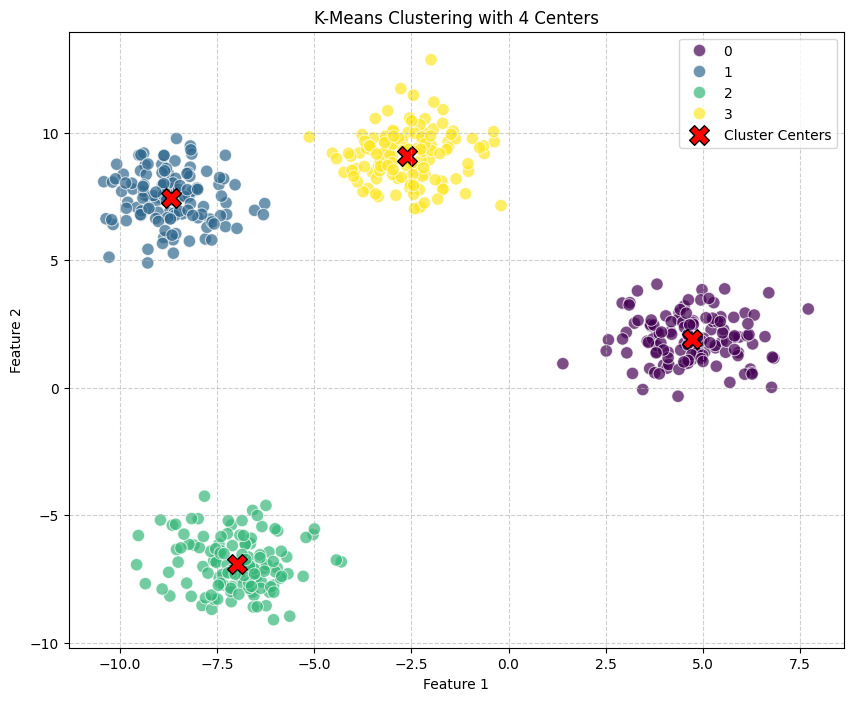


--- Interpretation of the plot ---
Each color represents a cluster identified by the K-Means algorithm.
The red 'X' markers indicate the centroids (centers) of these clusters.
You can observe how K-Means successfully grouped the data points around the true underlying centers.


In [1]:
#1. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import time

# 1. Generate synthetic data with 4 centers
n_samples = 500
n_features = 2 # For easy 2D visualization
n_centers = 4
random_state = 42 # For reproducibility

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=1.0, random_state=random_state)

print(f"Synthetic data generated with {n_samples} samples and {n_centers} true centers.")
print(f"Data shape: {X.shape}\n")

# 2. Apply K-Means clustering
# We know the true number of centers, so we set n_clusters = n_centers
# n_init='auto' handles multiple initializations and picks the best one (recommended for newer scikit-learn)
# For older versions, you might use n_init=10 explicitly.
kmeans = KMeans(n_clusters=n_centers, random_state=random_state, n_init='auto')

print(f"Applying K-Means clustering with n_clusters={n_centers}...")
start_time = time.time()
kmeans.fit(X)
end_time = time.time()
kmeans_time = end_time - start_time
print(f"K-Means clustering completed in {kmeans_time:.4f} seconds.\n")

# Get the cluster labels assigned by K-Means
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

print("K-Means assigned labels for first 10 samples:", labels[:10])
print("K-Means cluster centers:\n", centers)

# 3. Visualize the results using a scatter plot
plt.figure(figsize=(10, 8))

# Plot data points, colored by their assigned cluster label
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=80, alpha=0.7, legend='full')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', edgecolor='black', label='Cluster Centers')

plt.title(f'K-Means Clustering with {n_centers} Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print("\n--- Interpretation of the plot ---")
print("Each color represents a cluster identified by the K-Means algorithm.")
print("The red 'X' markers indicate the centroids (centers) of these clusters.")
print("You can observe how K-Means successfully grouped the data points around the true underlying centers.")

In [2]:
#2.  Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # To load the Iris dataset
from sklearn.cluster import AgglomerativeClustering # Agglomerative Clustering algorithm
import time

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y_true = iris.target # True labels (species: Setosa, Versicolor, Virginica)
feature_names = iris.feature_names
target_names = iris.target_names

print("Iris Dataset loaded.")
print(f"Features (X) shape: {X.shape}")
print(f"True Labels (y_true) shape: {y_true.shape}")
print(f"Feature Names: {feature_names}")
print(f"Target Names: {target_names}\n")

print("First 5 samples of features:\n", pd.DataFrame(X[:5], columns=feature_names))
print("\nFirst 5 true labels:", y_true[:5], " (mapping to:", [target_names[i] for i in y_true[:5]], ")\n")

# 2. Apply Agglomerative Clustering to group data into 3 clusters
n_clusters = 3 # We know there are 3 species in the Iris dataset

print(f"Applying Agglomerative Clustering with {n_clusters} clusters...")
start_time = time.time()

# Initialize AgglomerativeClustering
# n_clusters: The number of clusters to form.
# linkage: The linkage criterion to use. 'ward' is often a good default.
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit the model to the data and predict the clusters
# AgglomerativeClustering automatically performs fit_predict
predicted_labels = agg_clustering.fit_predict(X)

end_time = time.time()
clustering_time = end_time - start_time
print(f"Agglomerative Clustering completed in {clustering_time:.4f} seconds.\n")

# 3. Display the first 10 predicted labels
print("First 10 predicted cluster labels:")
print(predicted_labels[:10])

# Optional: Compare with true labels for initial samples (just for qualitative check)
print("\nFirst 10 true labels (for comparison):")
print(y_true[:10])

# Optional: Evaluate the clustering (e.g., using Adjusted Rand Index or Homogeneity Score)
# Note: In unsupervised learning, these metrics require true labels, which are often not available.
# We use them here for demonstrative purposes because Iris has known labels.
from sklearn.metrics import adjusted_rand_score, homogeneity_score

# It's important to note that cluster labels are arbitrary (e.g., cluster 0 might map to species 1)
# Adjusted Rand Index handles this permutation issue.
ari = adjusted_rand_score(y_true, predicted_labels)
homogeneity = homogeneity_score(y_true, predicted_labels)

print(f"\n--- Clustering Evaluation (using true labels for context) ---")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")
print("ARI measures similarity between clusterings, ignoring permutations.")
print("Homogeneity measures if each cluster contains only members of a single class.")

Iris Dataset loaded.
Features (X) shape: (150, 4)
True Labels (y_true) shape: (150,)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']

First 5 samples of features:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

First 5 true labels: [0 0 0 0 0]  (mapping to: [np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa')] )

Applying Agglomerative Clustering with 3 clusters...
Agglomerative Clustering completed in 0.0030 seconds.

First 10 predicted cluste

Synthetic 'make_moons' data generated with 500 samples.
Data shape: (500, 2)

Applying DBSCAN clustering with eps=0.1 and min_samples=5...
DBSCAN clustering completed in 0.0111 seconds.

Estimated number of clusters: 2
Number of noise points (outliers): 7
First 10 predicted labels (where -1 indicates an outlier): [0 1 0 1 1 0 0 1 1 0]


<ipython-input-3-f080f9b1869e>:76: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1],
<ipython-input-3-f080f9b1869e>:76: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1],


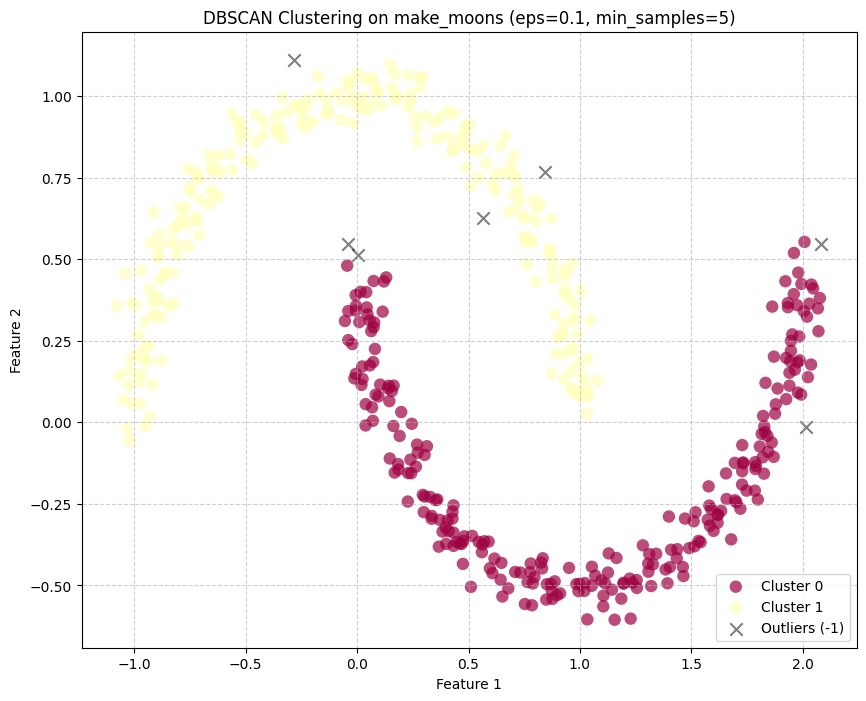


--- Interpretation of the plot ---
Different colors represent different clusters identified by DBSCAN.
The 'x' markers in black represent the noise points (outliers) that DBSCAN could not assign to any cluster based on the density parameters.
You can observe how DBSCAN effectively identifies the two moon-shaped clusters and separates the scattered noise points.


In [3]:
#3. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons # For generating moon-shaped data
from sklearn.cluster import DBSCAN      # DBSCAN clustering algorithm
import time

# 1. Generate synthetic data using make_moons
n_samples = 500
noise_level = 0.05 # Adjust noise to see how DBSCAN handles it
random_state = 42

X, y_true = make_moons(n_samples=n_samples, noise=noise_level, random_state=random_state)

print(f"Synthetic 'make_moons' data generated with {n_samples} samples.")
print(f"Data shape: {X.shape}\n")

# 2. Apply DBSCAN clustering
# Choosing appropriate eps and min_samples is crucial for DBSCAN.
# These values often require experimentation based on the dataset's density.
# For make_moons with noise=0.05, these values often work well:
eps_value = 0.1
min_samples_value = 5

print(f"Applying DBSCAN clustering with eps={eps_value} and min_samples={min_samples_value}...")
start_time = time.time()

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X) # Fit the model and predict cluster labels

end_time = time.time()
dbscan_time = end_time - start_time
print(f"DBSCAN clustering completed in {dbscan_time:.4f} seconds.\n")

# Identify the number of clusters found (excluding noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Number of noise points (outliers): {n_noise_}")
print("First 10 predicted labels (where -1 indicates an outlier):", labels[:10])

# 3. Visualize the results and highlight outliers
plt.figure(figsize=(10, 8))

# Get unique labels (including -1 for noise)
unique_labels = set(labels)

# Define a color map for clusters, ensuring noise (-1) gets a distinct color (e.g., black)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        marker = 'x'
        size = 80
        alpha = 0.5
        edgecolor = 'black'
        facecolor = 'black'
        label = 'Outliers (-1)'
    else:
        marker = 'o'
        size = 80
        alpha = 0.7
        edgecolor = 'none' # No edge for cluster points
        facecolor = col
        label = f'Cluster {k}'

    # Select points belonging to the current cluster k
    class_member_mask = (labels == k)
    xy = X[class_member_mask]

    # Plot the points
    plt.scatter(xy[:, 0], xy[:, 1],
                marker=marker, s=size, c=facecolor, edgecolor=edgecolor, alpha=alpha,
                label=label)

plt.title(f'DBSCAN Clustering on make_moons (eps={eps_value}, min_samples={min_samples_value})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.show()

print("\n--- Interpretation of the plot ---")
print("Different colors represent different clusters identified by DBSCAN.")
print("The 'x' markers in black represent the noise points (outliers) that DBSCAN could not assign to any cluster based on the density parameters.")
print("You can observe how DBSCAN effectively identifies the two moon-shaped clusters and separates the scattered noise points.")

In [4]:
#4. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

import numpy as np
import pandas as pd
from sklearn.datasets import load_wine # To load the Wine dataset
from sklearn.preprocessing import StandardScaler # For standardizing features
from sklearn.cluster import KMeans # K-Means clustering algorithm
import time

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y_true = wine.target # True labels (cultivars)
feature_names = wine.feature_names
target_names = wine.target_names

print("Wine Dataset loaded.")
print(f"Features (X) shape: {X.shape}")
print(f"True Labels (y_true) shape: {y_true.shape}")
print(f"Number of true classes (cultivars): {len(np.unique(y_true))}")
print(f"Feature Names: {feature_names}")
print(f"Target Names: {target_names}\n")

print("First 5 samples of raw features:\n", pd.DataFrame(X[:5], columns=feature_names))
print("\nTrue class distribution:\n", pd.Series(y_true).value_counts().sort_index())


# 2. Standardize the features
print("\n--- Standardizing Features ---")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 samples of scaled features:\n", pd.DataFrame(X_scaled[:5], columns=feature_names))
print(f"Mean of scaled features (should be close to 0): {np.mean(X_scaled):.2f}")
print(f"Std Dev of scaled features (should be close to 1): {np.std(X_scaled):.2f}\n")


# 3. Apply K-Means clustering
n_clusters = 3 # We know there are 3 cultivars in the Wine dataset

print(f"Applying K-Means clustering with {n_clusters} clusters on scaled data...")
start_time = time.time()

# Initialize KMeans
# n_clusters: The number of clusters to form.
# n_init='auto': Recommended for newer scikit-learn, runs multiple initializations and picks the best.
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

# Fit the model to the scaled data and predict the clusters
predicted_labels = kmeans.fit_predict(X_scaled)

end_time = time.time()
kmeans_time = end_time - start_time
print(f"K-Means clustering completed in {kmeans_time:.4f} seconds.\n")

# Get the cluster labels assigned by K-Means
print("First 10 predicted cluster labels:", predicted_labels[:10])


# 4. Print the size of each cluster
cluster_sizes = pd.Series(predicted_labels).value_counts().sort_index()

print("\n--- Size of Each Cluster (Predicted by K-Means) ---")
for cluster_id, size in cluster_sizes.items():
    print(f"Cluster {cluster_id}: {size} samples")

# Optional: Evaluate clustering performance (since we have true labels)
# It's important to note that cluster labels are arbitrary (e.g., cluster 0 might map to cultivar 1)
# Adjusted Rand Index (ARI) and Homogeneity Score are useful for this comparison.
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

ari = adjusted_rand_score(y_true, predicted_labels)
homogeneity = homogeneity_score(y_true, predicted_labels)
completeness = completeness_score(y_true, predicted_labels)
v_measure = v_measure_score(y_true, predicted_labels)

print(f"\n--- Clustering Evaluation (using true labels for context) ---")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print(f"V-Measure Score: {v_measure:.4f}")
print("\nThese metrics assess how well the clustering aligns with the true wine cultivars.")
print("Higher values (closer to 1.0) indicate better clustering performance.")

Wine Dataset loaded.
Features (X) shape: (178, 13)
True Labels (y_true) shape: (178,)
Number of true classes (cultivars): 3
Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Names: ['class_0' 'class_1' 'class_2']

First 5 samples of raw features:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06               

Synthetic 'make_circles' data generated with 500 samples.
Data shape: (500, 2)

Applying DBSCAN clustering with eps=0.1 and min_samples=5...
DBSCAN clustering completed in 0.0068 seconds.

Estimated number of clusters: 12
Number of noise points (outliers): 11
First 10 predicted labels (where -1 indicates an outlier): [0 1 0 7 2 0 0 3 1 0]


<ipython-input-5-a271ad318156>:78: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1],
<ipython-input-5-a271ad318156>:78: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1],


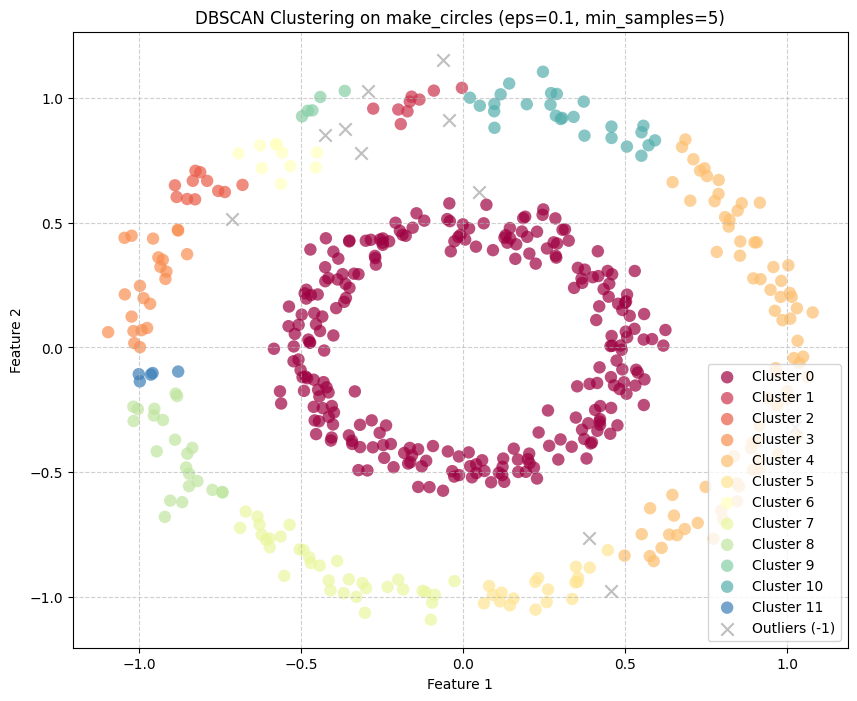


--- Interpretation of the plot ---
Different colors represent different clusters identified by DBSCAN.
The 'x' markers in grey/black represent the noise points (outliers) that DBSCAN could not assign to any cluster.
You can observe how DBSCAN successfully identifies the two concentric circles as separate clusters, which K-Means would struggle with.


In [5]:
#5. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles # For generating concentric circles data
from sklearn.cluster import DBSCAN      # DBSCAN clustering algorithm
import time

# 1. Generate synthetic data using make_circles
n_samples = 500
noise_level = 0.05 # Add some noise to make it more realistic
random_state = 42

X, y_true = make_circles(n_samples=n_samples, noise=noise_level, factor=0.5, random_state=random_state)
# factor: Scale factor between inner and outer circle. 0.5 means inner circle radius is half of outer.

print(f"Synthetic 'make_circles' data generated with {n_samples} samples.")
print(f"Data shape: {X.shape}\n")

# 2. Apply DBSCAN clustering
# Choosing appropriate eps and min_samples is crucial for DBSCAN.
# These values often require experimentation based on the dataset's density and the noise level.
# For make_circles with noise=0.05 and factor=0.5, these values often work well:
eps_value = 0.1
min_samples_value = 5

print(f"Applying DBSCAN clustering with eps={eps_value} and min_samples={min_samples_value}...")
start_time = time.time()

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X) # Fit the model and predict cluster labels

end_time = time.time()
dbscan_time = end_time - start_time
print(f"DBSCAN clustering completed in {dbscan_time:.4f} seconds.\n")

# Identify the number of clusters found (excluding noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Number of noise points (outliers): {n_noise_}")
print("First 10 predicted labels (where -1 indicates an outlier):", labels[:10])

# 3. Plot the result
plt.figure(figsize=(10, 8))

# Get unique labels (including -1 for noise)
unique_labels = set(labels)

# Define a color map for clusters, ensuring noise (-1) gets a distinct color (e.g., black or grey)
# We use a colormap for clusters and a specific color for noise.
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black or grey color for noise points
        marker = 'x'
        size = 80
        alpha = 0.5
        edgecolor = 'black'
        facecolor = 'gray' # Use gray for better contrast if background is dark
        label = 'Outliers (-1)'
    else:
        marker = 'o'
        size = 80
        alpha = 0.7
        edgecolor = 'none' # No edge for cluster points
        facecolor = col
        label = f'Cluster {k}'

    # Select points belonging to the current cluster k
    class_member_mask = (labels == k)
    xy = X[class_member_mask]

    # Plot the points
    plt.scatter(xy[:, 0], xy[:, 1],
                marker=marker, s=size, c=facecolor, edgecolor=edgecolor, alpha=alpha,
                label=label)

plt.title(f'DBSCAN Clustering on make_circles (eps={eps_value}, min_samples={min_samples_value})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.show()

print("\n--- Interpretation of the plot ---")
print("Different colors represent different clusters identified by DBSCAN.")
print("The 'x' markers in grey/black represent the noise points (outliers) that DBSCAN could not assign to any cluster.")
print("You can observe how DBSCAN successfully identifies the two concentric circles as separate clusters, which K-Means would struggle with.")

In [6]:
#6. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer # To load the Breast Cancer dataset
from sklearn.preprocessing import MinMaxScaler # For scaling features
from sklearn.cluster import KMeans # K-Means clustering algorithm
import time

# 1. Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data  # Features
y_true = cancer.target # True labels (0: malignant, 1: benign)
feature_names = cancer.feature_names
target_names = cancer.target_names

print("Breast Cancer Dataset loaded.")
print(f"Features (X) shape: {X.shape}")
print(f"True Labels (y_true) shape: {y_true.shape}")
print(f"Number of true classes: {len(np.unique(y_true))}")
print(f"Feature Names: {feature_names}")
print(f"Target Names: {target_names}\n")

print("First 5 samples of raw features (first 5 features):\n", pd.DataFrame(X[:5, :5], columns=feature_names[:5]))
print("\nTrue class distribution:\n", pd.Series(y_true).value_counts().sort_index())


# 2. Apply MinMaxScaler to the features
print("\n--- Applying MinMaxScaler to Features ---")
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 samples of scaled features (first 5 features):\n", pd.DataFrame(X_scaled[:5, :5], columns=feature_names[:5]))
print(f"Min value of scaled features (should be close to 0): {np.min(X_scaled):.2f}")
print(f"Max value of scaled features (should be close to 1): {np.max(X_scaled):.2f}\n")


# 3. Apply K-Means clustering with 2 clusters
n_clusters = 2 # We aim for 2 clusters, corresponding to malignant/benign

print(f"Applying K-Means clustering with {n_clusters} clusters on scaled data...")
start_time = time.time()

# Initialize KMeans
# n_clusters: The number of clusters to form.
# n_init='auto': Recommended for newer scikit-learn, runs multiple initializations and picks the best.
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

# Fit the model to the scaled data and predict the clusters
predicted_labels = kmeans.fit_predict(X_scaled)

end_time = time.time()
kmeans_time = end_time - start_time
print(f"K-Means clustering completed in {kmeans_time:.4f} seconds.\n")

# Get the cluster labels assigned by K-Means
print("First 10 predicted cluster labels:", predicted_labels[:10])


# 4. Output the cluster centroids
cluster_centroids = kmeans.cluster_centers_

print(f"\n--- Cluster Centroids (Scaled Feature Values) for {n_clusters} Clusters ---")
# Create a DataFrame for better readability, with feature names as columns
centroids_df = pd.DataFrame(cluster_centroids, columns=feature_names)
centroids_df.index.name = 'Cluster ID'
print(centroids_df.round(4)) # Round for better readability

# Optional: Evaluate clustering performance (since we have true labels)
# It's important to note that cluster labels are arbitrary (e.g., cluster 0 might map to malignant)
# Adjusted Rand Index (ARI) and Homogeneity Score are useful for this comparison.
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

ari = adjusted_rand_score(y_true, predicted_labels)
homogeneity = homogeneity_score(y_true, predicted_labels)
completeness = completeness_score(y_true, predicted_labels)
v_measure = v_measure_score(y_true, predicted_labels)

print(f"\n--- Clustering Evaluation (using true labels for context) ---")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print(f"V-Measure Score: {v_measure:.4f}")
print("\nThese metrics assess how well the clustering aligns with the true malignant/benign labels.")
print("Higher values (closer to 1.0) indicate better clustering performance.")

Breast Cancer Dataset loaded.
Features (X) shape: (569, 30)
True Labels (y_true) shape: (569,)
Number of true classes: 2
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Names: ['malignant' 'benign']

First 5 samples of raw features (first 5 features):
    mean radius  mean texture  mean perimeter  mean area  mean smoothness
0        17.99         10.38          122.80     1001.0          0.11840
1        20.57         17.77          132.90     1326.0          0.08474

Synthetic data generated with 800 samples and 3 true centers.
Cluster standard deviations: [0.5, 1.5, 3.0]
Data shape: (800, 2)

Applying DBSCAN clustering with eps=0.8 and min_samples=5...
DBSCAN clustering completed in 0.0101 seconds.

Estimated number of clusters: 8
Number of noise points (outliers): 92
First 10 predicted labels (where -1 indicates an outlier): [ 0  1  2  2  2 -1  3  3  2  4]


<ipython-input-7-85f578fffc28>:81: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1],
<ipython-input-7-85f578fffc28>:81: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1],


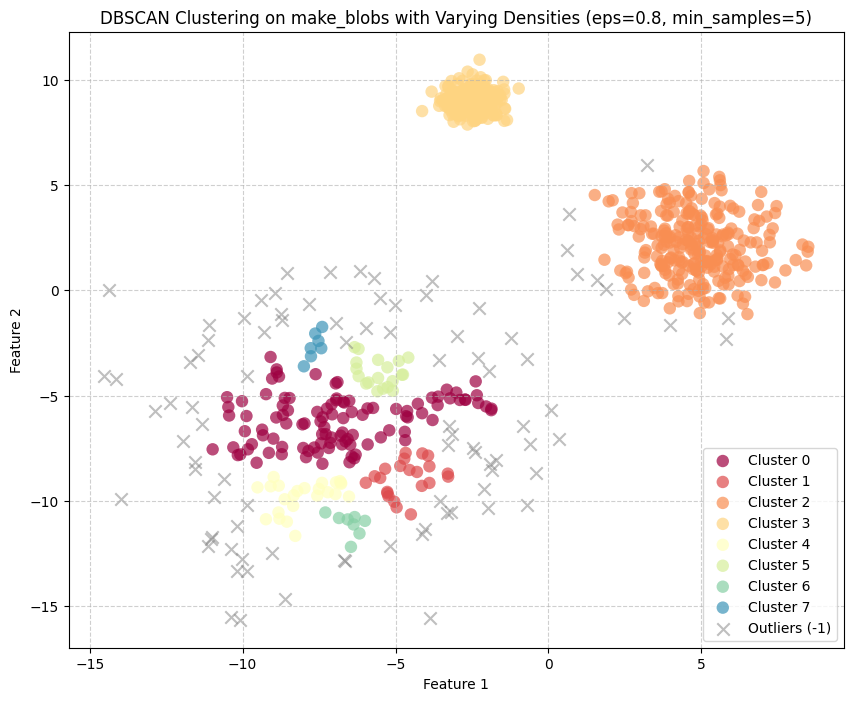


--- Interpretation of the plot ---
Different colors represent different clusters identified by DBSCAN.
The 'x' markers in grey/black represent the noise points (outliers).
Observe how DBSCAN might struggle to perfectly separate clusters with very different densities.
You might see the densest cluster correctly identified, but sparser clusters might be partially or fully labeled as noise, or merged with other clusters.


In [7]:
#7. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs # For generating synthetic data
from sklearn.cluster import DBSCAN      # DBSCAN clustering algorithm
import time

# 1. Generate synthetic data with varying cluster standard deviations
n_samples = 800
n_features = 2 # For easy 2D visualization
n_centers = 3
# Define varying standard deviations for each cluster
# One tight, one medium, one very spread out
cluster_stds = [0.5, 1.5, 3.0]
random_state = 42

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=cluster_stds, random_state=random_state)

print(f"Synthetic data generated with {n_samples} samples and {n_centers} true centers.")
print(f"Cluster standard deviations: {cluster_stds}")
print(f"Data shape: {X.shape}\n")

# 2. Apply DBSCAN clustering
# Choosing appropriate eps and min_samples is crucial and challenging here.
# We'll pick values that might work for the "average" density, but might struggle with extremes.
eps_value = 0.8 # Experiment with this value
min_samples_value = 5 # Experiment with this value

print(f"Applying DBSCAN clustering with eps={eps_value} and min_samples={min_samples_value}...")
start_time = time.time()

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X) # Fit the model and predict cluster labels

end_time = time.time()
dbscan_time = end_time - start_time
print(f"DBSCAN clustering completed in {dbscan_time:.4f} seconds.\n")

# Identify the number of clusters found (excluding noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Number of noise points (outliers): {n_noise_}")
print("First 10 predicted labels (where -1 indicates an outlier):", labels[:10])

# 3. Visualize the results
plt.figure(figsize=(10, 8))

# Get unique labels (including -1 for noise)
unique_labels = set(labels)

# Define a color map for clusters, ensuring noise (-1) gets a distinct color (e.g., black)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black or grey color for noise.
        marker = 'x'
        size = 80
        alpha = 0.5
        edgecolor = 'black'
        facecolor = 'gray'
        label = 'Outliers (-1)'
    else:
        marker = 'o'
        size = 80
        alpha = 0.7
        edgecolor = 'none' # No edge for cluster points
        facecolor = col
        label = f'Cluster {k}'

    # Select points belonging to the current cluster k
    class_member_mask = (labels == k)
    xy = X[class_member_mask]

    # Plot the points
    plt.scatter(xy[:, 0], xy[:, 1],
                marker=marker, s=size, c=facecolor, edgecolor=edgecolor, alpha=alpha,
                label=label)

plt.title(f'DBSCAN Clustering on make_blobs with Varying Densities (eps={eps_value}, min_samples={min_samples_value})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.show()

print("\n--- Interpretation of the plot ---")
print("Different colors represent different clusters identified by DBSCAN.")
print("The 'x' markers in grey/black represent the noise points (outliers).")
print("Observe how DBSCAN might struggle to perfectly separate clusters with very different densities.")
print("You might see the densest cluster correctly identified, but sparser clusters might be partially or fully labeled as noise, or merged with other clusters.")

Synthetic data generated with 800 samples and 3 true centers.
Cluster standard deviations used: [0.5, 1.5, 3.0]
Data shape: (800, 2)

Applying DBSCAN clustering with eps=0.8 and min_samples=5...
DBSCAN clustering completed in 0.0126 seconds.

Estimated number of clusters found by DBSCAN: 8
Number of noise points (outliers, labeled -1): 92
First 10 predicted labels (where -1 indicates an outlier): [ 0  1  2  2  2 -1  3  3  2  4]


<ipython-input-8-b048dac5876b>:83: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1],
<ipython-input-8-b048dac5876b>:83: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1],


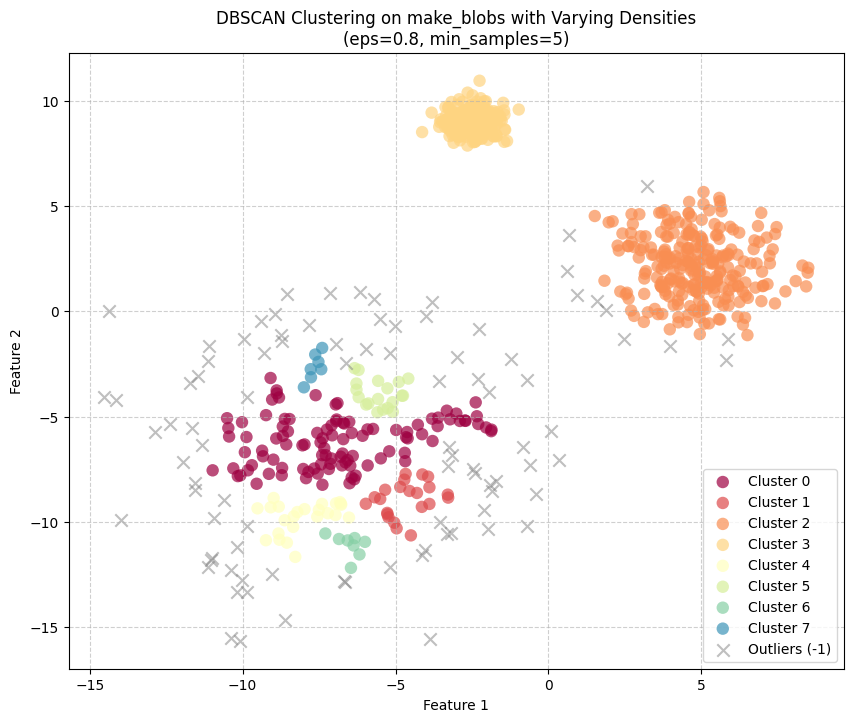


--- Interpretation of the plot ---
Different colors represent different clusters identified by DBSCAN.
The 'x' markers in grey/black represent the noise points (outliers) that DBSCAN could not assign to any cluster.
You will likely observe that DBSCAN struggles to perfectly separate clusters with very different densities using a single set of global parameters.
For instance, the densest cluster might be well-identified, but sparser clusters might be partially or fully labeled as noise, or incorrectly merged if 'eps' is too large.


In [8]:
#8.  Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs # For generating synthetic data
from sklearn.cluster import DBSCAN      # DBSCAN clustering algorithm
import time

# 1. Generate synthetic data with varying cluster standard deviations
n_samples = 800
n_features = 2 # For easy 2D visualization
n_centers = 3
# Define varying standard deviations for each cluster
# This will create one tight, one medium, and one very spread out cluster
cluster_stds = [0.5, 1.5, 3.0]
random_state = 42 # For reproducibility

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=cluster_stds, random_state=random_state)

print(f"Synthetic data generated with {n_samples} samples and {n_centers} true centers.")
print(f"Cluster standard deviations used: {cluster_stds}")
print(f"Data shape: {X.shape}\n")

# 2. Apply DBSCAN clustering
# Choosing appropriate eps and min_samples is crucial and challenging here.
# We'll pick values that might work for the "average" density, but might struggle with extremes.
# You can experiment with these values to see their effect.
eps_value = 0.8
min_samples_value = 5

print(f"Applying DBSCAN clustering with eps={eps_value} and min_samples={min_samples_value}...")
start_time = time.time()

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X) # Fit the model and predict cluster labels

end_time = time.time()
dbscan_time = end_time - start_time
print(f"DBSCAN clustering completed in {dbscan_time:.4f} seconds.\n")

# Identify the number of clusters found (excluding noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters found by DBSCAN: {n_clusters_}")
print(f"Number of noise points (outliers, labeled -1): {n_noise_}")
print("First 10 predicted labels (where -1 indicates an outlier):", labels[:10])

# 3. Visualize the results
plt.figure(figsize=(10, 8))

# Get unique labels (including -1 for noise)
unique_labels = set(labels)

# Define a color map for clusters, ensuring noise (-1) gets a distinct color (e.g., black or grey)
# We use a colormap for clusters and a specific color for noise.
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black or grey color for noise points
        marker = 'x'
        size = 80
        alpha = 0.5
        edgecolor = 'black'
        facecolor = 'gray' # Using gray for better contrast against potentially colorful clusters
        label = 'Outliers (-1)'
    else:
        marker = 'o'
        size = 80
        alpha = 0.7
        edgecolor = 'none' # No edge for cluster points
        facecolor = col
        label = f'Cluster {k}'

    # Select points belonging to the current cluster k
    class_member_mask = (labels == k)
    xy = X[class_member_mask]

    # Plot the points
    plt.scatter(xy[:, 0], xy[:, 1],
                marker=marker, s=size, c=facecolor, edgecolor=edgecolor, alpha=alpha,
                label=label)

plt.title(f'DBSCAN Clustering on make_blobs with Varying Densities\n(eps={eps_value}, min_samples={min_samples_value})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.show()

print("\n--- Interpretation of the plot ---")
print("Different colors represent different clusters identified by DBSCAN.")
print("The 'x' markers in grey/black represent the noise points (outliers) that DBSCAN could not assign to any cluster.")
print("You will likely observe that DBSCAN struggles to perfectly separate clusters with very different densities using a single set of global parameters.")
print("For instance, the densest cluster might be well-identified, but sparser clusters might be partially or fully labeled as noise, or incorrectly merged if 'eps' is too large.")

Synthetic data generated with 500 samples and 4 true centers.
Data shape: (500, 2)

--- Evaluating Silhouette Scores for different k values ---
Clustering with k = 2...
  K-Means for k=2 completed in 0.0040 seconds.
  Silhouette Score for k=2: 0.5955

Clustering with k = 3...
  K-Means for k=3 completed in 0.0161 seconds.
  Silhouette Score for k=3: 0.7613

Clustering with k = 4...
  K-Means for k=4 completed in 0.0108 seconds.
  Silhouette Score for k=4: 0.7911

Clustering with k = 5...
  K-Means for k=5 completed in 0.0114 seconds.
  Silhouette Score for k=5: 0.6884


--- Silhouette Score Results ---
   Number of Clusters (k)  Silhouette Score
0                       2            0.5955
1                       3            0.7613
2                       4            0.7911
3                       5            0.6884


<ipython-input-9-446cd2fdfefd>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Clusters (k)', y='Silhouette Score', data=results_df, palette='viridis')


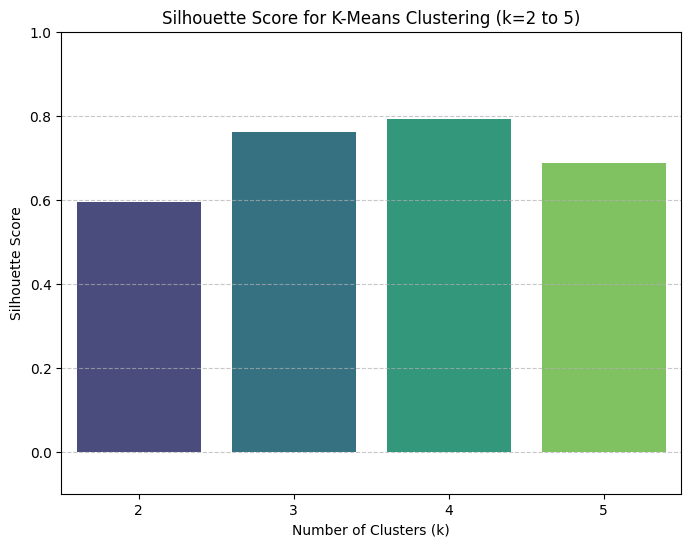


--- Interpretation of the Bar Chart ---
The bar chart shows the Silhouette Score for each tested number of clusters (k).
A higher Silhouette Score indicates better-defined clusters.
Given the data was generated with 4 true centers, you would expect the Silhouette Score to be highest around k=4.
This plot helps in determining an optimal 'k' when the true number of clusters is unknown.


In [9]:
#9. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Import Silhouette Score
import time

# 1. Generate synthetic data with a known number of centers (e.g., 4)
# We'll generate with 4 centers to see if the Silhouette Score peaks around k=4.
n_samples = 500
n_features = 2 # For easy 2D visualization
true_n_centers = 4
random_state = 42

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=true_n_centers, cluster_std=1.0, random_state=random_state)

print(f"Synthetic data generated with {n_samples} samples and {true_n_centers} true centers.")
print(f"Data shape: {X.shape}\n")

# 2. Define k range for evaluation
k_values = range(2, 6) # From k=2 to k=5

# Lists to store Silhouette Scores
silhouette_scores = []
kmeans_models = [] # To store trained KMeans models (optional)

print("--- Evaluating Silhouette Scores for different k values ---")
for k in k_values:
    print(f"Clustering with k = {k}...")
    start_time = time.time()

    # Initialize and fit KMeans
    # n_init='auto' is recommended for newer scikit-learn
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
    kmeans.fit(X)

    end_time = time.time()
    kmeans_time = end_time - start_time
    print(f"  K-Means for k={k} completed in {kmeans_time:.4f} seconds.")

    # Get cluster labels
    labels = kmeans.labels_

    # Calculate Silhouette Score
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    kmeans_models.append(kmeans) # Store the model

    print(f"  Silhouette Score for k={k}: {score:.4f}\n")

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({
    'Number of Clusters (k)': list(k_values),
    'Silhouette Score': silhouette_scores
})

print("\n--- Silhouette Score Results ---")
print(results_df.round(4))

# 4. Display as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Number of Clusters (k)', y='Silhouette Score', data=results_df, palette='viridis')
plt.title('Silhouette Score for K-Means Clustering (k=2 to 5)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.ylim(-0.1, 1.0) # Silhouette scores range from -1 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n--- Interpretation of the Bar Chart ---")
print("The bar chart shows the Silhouette Score for each tested number of clusters (k).")
print("A higher Silhouette Score indicates better-defined clusters.")
print(f"Given the data was generated with {true_n_centers} true centers, you would expect the Silhouette Score to be highest around k={true_n_centers}.")
print("This plot helps in determining an optimal 'k' when the true number of clusters is unknown.")

Iris Dataset loaded.
Features (X) shape: (150, 4)
True Labels (y_true) shape: (150,)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']

First 5 samples of features:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

--- Computing Linkage Matrix (Average Linkage) ---
Linkage matrix computation completed in 0.0016 seconds.
Linkage matrix shape: (149, 4)



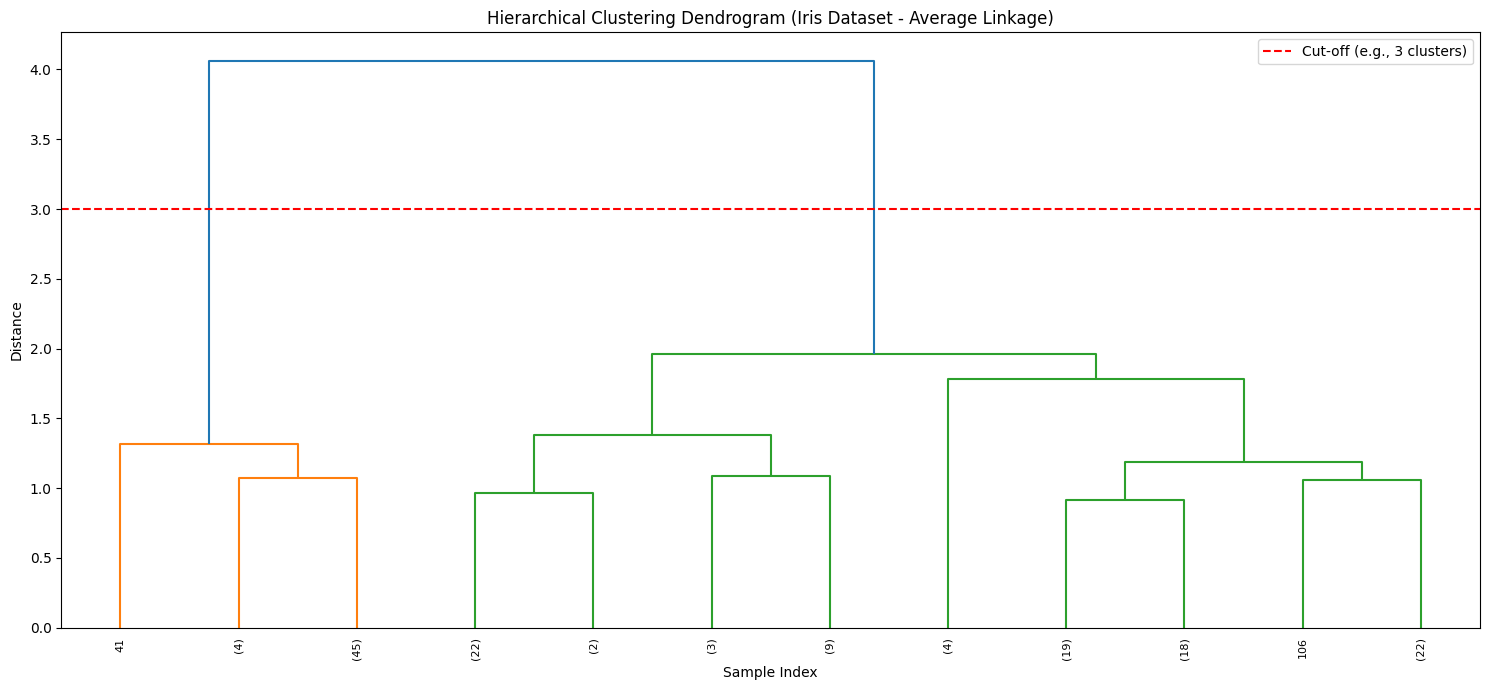


--- Interpretation of the Dendrogram ---
The dendrogram shows the hierarchical relationships between clusters.
The height of each merge point on the Y-axis indicates the dissimilarity (distance) at which the clusters were merged.
A horizontal line drawn across the dendrogram (e.g., at Y=3.0) can define the clusters at that specific distance.
Clusters that merge at lower heights are more similar.
For the Iris dataset, if you cut the dendrogram at an appropriate height, you should observe 3 main clusters, corresponding to the 3 species.


In [10]:
#10.  Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris # To load the Iris dataset
from scipy.cluster.hierarchy import linkage, dendrogram # For hierarchical clustering and plotting
import time

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y_true = iris.target # True labels (species: Setosa, Versicolor, Virginica)
feature_names = iris.feature_names
target_names = iris.target_names

print("Iris Dataset loaded.")
print(f"Features (X) shape: {X.shape}")
print(f"True Labels (y_true) shape: {y_true.shape}")
print(f"Feature Names: {feature_names}")
print(f"Target Names: {target_names}\n")

print("First 5 samples of features:\n", pd.DataFrame(X[:5], columns=feature_names))


# 2. Compute the linkage matrix using 'average' linkage
print("\n--- Computing Linkage Matrix (Average Linkage) ---")
start_time = time.time()

# 'linkage' function performs hierarchical clustering
# X: The observation matrix
# method: The linkage algorithm to use. 'average' calculates the average distance.
# metric: The distance metric to use. 'euclidean' is common.
Z = linkage(X, method='average', metric='euclidean')

end_time = time.time()
linkage_time = end_time - start_time
print(f"Linkage matrix computation completed in {linkage_time:.4f} seconds.")
print(f"Linkage matrix shape: {Z.shape}\n") # Z has (n_samples - 1) rows, 4 columns


# 3. Plot the dendrogram
plt.figure(figsize=(15, 7))
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset - Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# The dendrogram function plots the hierarchical clustering as a dendrogram.
# Z: The linkage matrix generated by the linkage function.
# truncate_mode='lastp': Show only the last 'p' merged clusters (useful for large datasets)
# p=12: Show the last 12 merges
# show_leaf_counts=True: Show the number of original observations in each leaf cluster
# leaf_rotation=90.: Rotate leaf labels for better readability
# leaf_font_size=8.: Font size for leaf labels
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show only the last 12 merged clusters
    show_leaf_counts=True,  # show the number of original observations in the leaf nodes
    leaf_rotation=90.,      # rotate the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=3.0, color='r', linestyle='--', label='Cut-off (e.g., 3 clusters)') # Example cut-off
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\n--- Interpretation of the Dendrogram ---")
print("The dendrogram shows the hierarchical relationships between clusters.")
print("The height of each merge point on the Y-axis indicates the dissimilarity (distance) at which the clusters were merged.")
print("A horizontal line drawn across the dendrogram (e.g., at Y=3.0) can define the clusters at that specific distance.")
print("Clusters that merge at lower heights are more similar.")
print("For the Iris dataset, if you cut the dendrogram at an appropriate height, you should observe 3 main clusters, corresponding to the 3 species.")

Synthetic data generated with 500 samples and 3 true centers.
Cluster standard deviation: 1.8 (indicating overlap)
Data shape: (500, 2)

Applying K-Means clustering with n_clusters=3...
K-Means clustering completed in 0.0039 seconds.

K-Means assigned labels for first 10 samples: [1 0 0 2 0 0 1 0 0 1]
K-Means cluster centers:
 [[ 4.55690488  1.94230495]
 [-6.79245828 -6.65774811]
 [-2.56531875  9.09355876]]


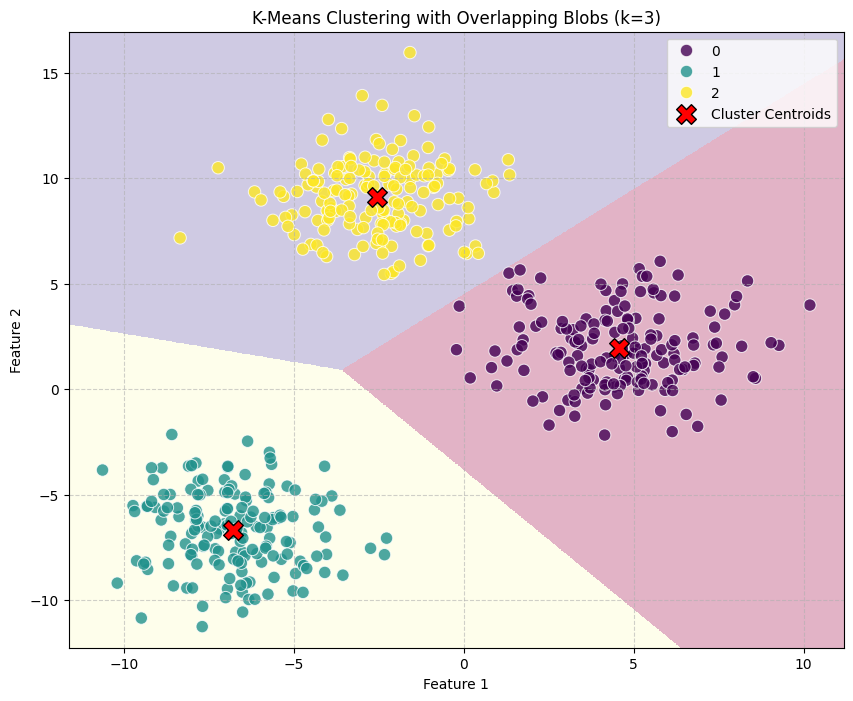


--- Interpretation of the plot ---
The colored background regions represent the decision boundaries of K-Means.
Each region indicates which cluster a new data point would be assigned to based on its proximity to the centroids.
The data points are colored by their assigned cluster, and the red 'X' markers are the cluster centroids.
You can observe how K-Means creates linear decision boundaries (Voronoi cells) even when the underlying clusters overlap, leading to some misclassifications in the overlapping regions.


In [11]:
#11. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import time

# 1. Generate synthetic data with overlapping clusters
n_samples = 500
n_features = 2 # For easy 2D visualization
n_centers = 3 # Let's use 3 centers
# Increase cluster_std to create overlap
cluster_std_value = 1.8 # Experiment with this value (e.g., 0.8 for distinct, 1.8 for overlapping)
random_state = 42 # For reproducibility

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=cluster_std_value, random_state=random_state)

print(f"Synthetic data generated with {n_samples} samples and {n_centers} true centers.")
print(f"Cluster standard deviation: {cluster_std_value} (indicating overlap)")
print(f"Data shape: {X.shape}\n")

# 2. Apply K-Means clustering
# We know the true number of centers, so we set n_clusters = n_centers
kmeans = KMeans(n_clusters=n_centers, random_state=random_state, n_init='auto')

print(f"Applying K-Means clustering with n_clusters={n_centers}...")
start_time = time.time()
kmeans.fit(X)
end_time = time.time()
kmeans_time = end_time - start_time
print(f"K-Means clustering completed in {kmeans_time:.4f} seconds.\n")

# Get the cluster labels assigned by K-Means
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

print("K-Means assigned labels for first 10 samples:", labels[:10])
print("K-Means cluster centers:\n", centers)

# 3. Visualize the results with decision boundaries
plt.figure(figsize=(10, 8))

# Define the boundaries of the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a mesh grid to plot decision boundaries
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict cluster for each point in the mesh grid
# ravel() flattens the grid, c_ combines x and y coordinates
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) # Reshape back to grid format

# Plot the decision boundaries (colored regions)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Spectral, # Use a color map for clusters
           aspect='auto', origin='lower', alpha=0.3)

# Plot the original data points, colored by their assigned cluster label
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=80, alpha=0.8, legend='full')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', edgecolor='black', label='Cluster Centroids')

plt.title(f'K-Means Clustering with Overlapping Blobs (k={n_centers})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print("\n--- Interpretation of the plot ---")
print("The colored background regions represent the decision boundaries of K-Means.")
print("Each region indicates which cluster a new data point would be assigned to based on its proximity to the centroids.")
print("The data points are colored by their assigned cluster, and the red 'X' markers are the cluster centroids.")
print("You can observe how K-Means creates linear decision boundaries (Voronoi cells) even when the underlying clusters overlap, leading to some misclassifications in the overlapping regions.")

Digits Dataset loaded.
Features (X) shape: (1797, 64)
True Labels (y_true) shape: (1797,)
Number of true classes (digits): 10

Applying t-SNE dimensionality reduction to 2 dimensions...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE completed in 17.7322 seconds.
Reduced data shape: (1797, 2)

Applying DBSCAN clustering on t-SNE data with eps=2.5 and min_samples=10...
DBSCAN clustering completed in 0.0119 seconds.

Estimated number of clusters found by DBSCAN: 19
Number of noise points (outliers, labeled -1): 44
First 10 predicted labels (where -1 indicates an outlier): [ 0 12  1  2  3  4  5  6  7  4]


<ipython-input-12-e00af23a89f4>:100: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1],
<ipython-input-12-e00af23a89f4>:100: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1],


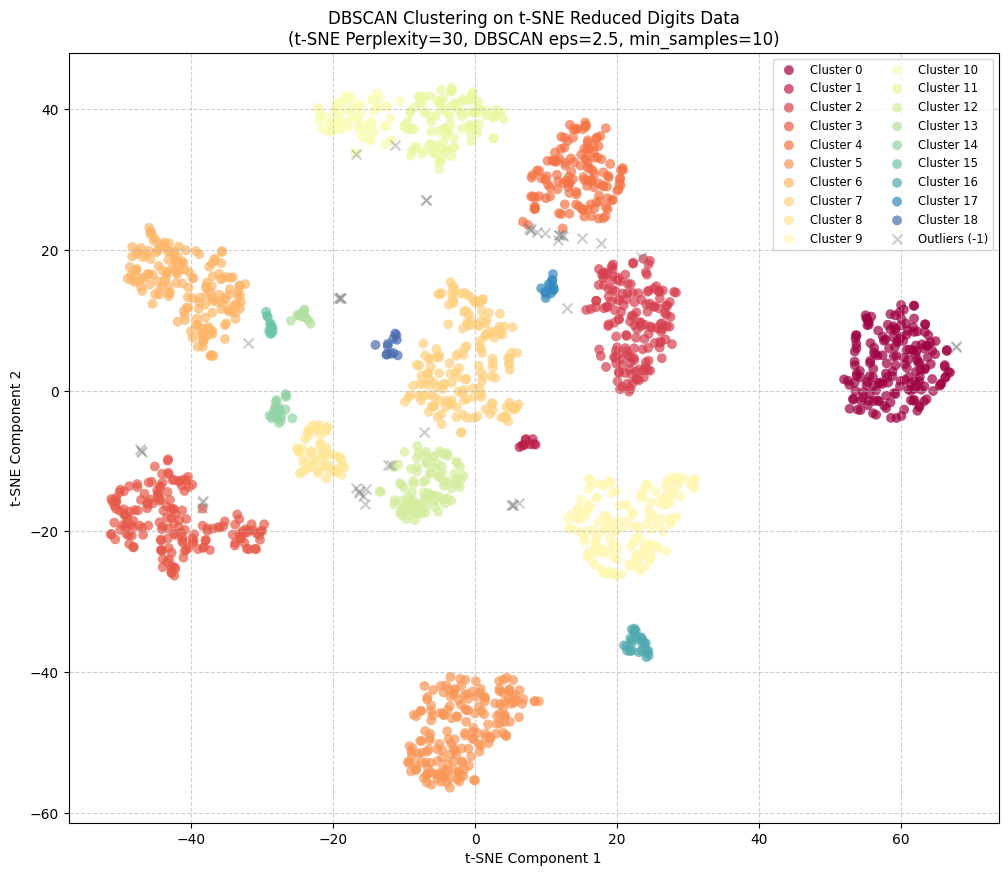


--- Interpretation of the plot ---
Each color represents a cluster identified by DBSCAN on the 2D t-SNE projection.
The 'x' markers in grey/black represent the noise points (outliers).
You should observe that t-SNE has grouped similar digits together, forming visually distinct 'blobs' or 'arms'.
DBSCAN then attempts to find dense regions within this t-SNE projection, identifying clusters and outliers.
The effectiveness of DBSCAN here depends heavily on the chosen 'eps' and 'min_samples' parameters, as t-SNE can alter the density characteristics.


In [12]:
#12.  Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits # To load the Digits dataset
from sklearn.manifold import TSNE       # For t-SNE dimensionality reduction
from sklearn.cluster import DBSCAN      # DBSCAN clustering algorithm
import time

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data  # Features (64 dimensions - 8x8 pixel images)
y_true = digits.target # True labels (0-9)

print("Digits Dataset loaded.")
print(f"Features (X) shape: {X.shape}")
print(f"True Labels (y_true) shape: {y_true.shape}")
print(f"Number of true classes (digits): {len(np.unique(y_true))}\n")

# 2. Dimensionality Reduction with t-SNE
# t-SNE can be computationally intensive for very large datasets.
# Perplexity is a critical parameter (typically 5-50).
# We'll use a fixed random_state for reproducibility.
n_components_tsne = 2 # Reduce to 2 dimensions for plotting
perplexity_value = 30 # Common value, can be tuned
n_iter_tsne = 1000    # Number of iterations

print(f"Applying t-SNE dimensionality reduction to {n_components_tsne} dimensions...")
start_time_tsne = time.time()

tsne = TSNE(n_components=n_components_tsne, perplexity=perplexity_value,
            n_iter=n_iter_tsne, random_state=42, learning_rate='auto', init='random')
X_tsne = tsne.fit_transform(X)

end_time_tsne = time.time()
tsne_time = end_time_tsne - start_time_tsne
print(f"t-SNE completed in {tsne_time:.4f} seconds.")
print(f"Reduced data shape: {X_tsne.shape}\n")


# 3. Apply DBSCAN clustering to the t-SNE reduced data
# Choosing appropriate eps and min_samples for DBSCAN after t-SNE can be tricky.
# t-SNE can sometimes create artificial clusters or spread out dense regions.
# These values often require experimentation.
eps_value = 2.5 # Experiment with this value
min_samples_value = 10 # Experiment with this value

print(f"Applying DBSCAN clustering on t-SNE data with eps={eps_value} and min_samples={min_samples_value}...")
start_time_dbscan = time.time()

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X_tsne) # Fit the model and predict cluster labels

end_time_dbscan = time.time()
dbscan_time = end_time_dbscan - start_time_dbscan
print(f"DBSCAN clustering completed in {dbscan_time:.4f} seconds.\n")

# Identify the number of clusters found (excluding noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters found by DBSCAN: {n_clusters_}")
print(f"Number of noise points (outliers, labeled -1): {n_noise_}")
print("First 10 predicted labels (where -1 indicates an outlier):", labels[:10])


# 4. Visualize the results
plt.figure(figsize=(12, 10))

# Get unique labels (including -1 for noise)
unique_labels = set(labels)

# Define a color map for clusters, ensuring noise (-1) gets a distinct color (e.g., black)
# Use a colormap with enough distinct colors for the number of clusters found + 1 for noise
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black or grey color for noise points
        marker = 'x'
        size = 50
        alpha = 0.4
        edgecolor = 'black'
        facecolor = 'gray' # Using gray for better contrast
        label = 'Outliers (-1)'
    else:
        marker = 'o'
        size = 50
        alpha = 0.7
        edgecolor = 'none' # No edge for cluster points
        facecolor = col
        label = f'Cluster {k}'

    # Select points belonging to the current cluster k
    class_member_mask = (labels == k)
    xy = X_tsne[class_member_mask]

    # Plot the points
    plt.scatter(xy[:, 0], xy[:, 1],
                marker=marker, s=size, c=facecolor, edgecolor=edgecolor, alpha=alpha,
                label=label)

plt.title(f'DBSCAN Clustering on t-SNE Reduced Digits Data\n(t-SNE Perplexity={perplexity_value}, DBSCAN eps={eps_value}, min_samples={min_samples_value})')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best', ncol=2, fontsize='small')
plt.show()

print("\n--- Interpretation of the plot ---")
print("Each color represents a cluster identified by DBSCAN on the 2D t-SNE projection.")
print("The 'x' markers in grey/black represent the noise points (outliers).")
print("You should observe that t-SNE has grouped similar digits together, forming visually distinct 'blobs' or 'arms'.")
print("DBSCAN then attempts to find dense regions within this t-SNE projection, identifying clusters and outliers.")
print("The effectiveness of DBSCAN here depends heavily on the chosen 'eps' and 'min_samples' parameters, as t-SNE can alter the density characteristics.")

Synthetic data generated with 500 samples and 4 true centers.
Data shape: (500, 2)

Applying Agglomerative Clustering with 4 clusters and 'complete' linkage...
Agglomerative Clustering completed in 0.0095 seconds.

First 10 predicted cluster labels: [3 1 0 2 1 1 3 1 0 1]


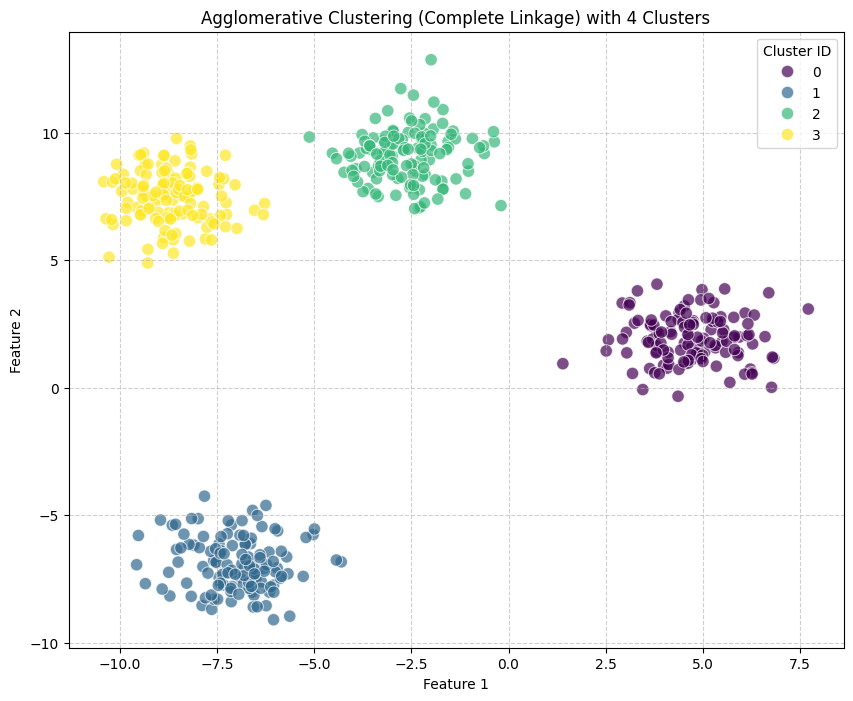


--- Interpretation of the plot ---
Each color represents a cluster identified by the Agglomerative Clustering algorithm with complete linkage.
You can observe how the algorithm grouped the data points into the specified number of clusters.
Complete linkage tends to produce more compact, roughly spherical clusters.


In [13]:
#13. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering # Agglomerative Clustering algorithm
import time

# 1. Generate synthetic data with 4 centers
n_samples = 500
n_features = 2 # For easy 2D visualization
n_centers = 4 # Let's use 4 centers
cluster_std_value = 1.0 # Standard deviation for clusters
random_state = 42 # For reproducibility

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=cluster_std_value, random_state=random_state)

print(f"Synthetic data generated with {n_samples} samples and {n_centers} true centers.")
print(f"Data shape: {X.shape}\n")

# 2. Apply Agglomerative Clustering with complete linkage
n_clusters_to_find = 4 # We aim to find 4 clusters

print(f"Applying Agglomerative Clustering with {n_clusters_to_find} clusters and 'complete' linkage...")
start_time = time.time()

# Initialize AgglomerativeClustering
# n_clusters: The number of clusters to form.
# linkage: The linkage criterion to use. 'complete' is specified.
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_to_find, linkage='complete')

# Fit the model to the data and predict the clusters
predicted_labels = agg_clustering.fit_predict(X)

end_time = time.time()
clustering_time = end_time - start_time
print(f"Agglomerative Clustering completed in {clustering_time:.4f} seconds.\n")

# Get the cluster labels assigned
print("First 10 predicted cluster labels:", predicted_labels[:10])

# 3. Plot the result
plt.figure(figsize=(10, 8))

# Plot data points, colored by their assigned cluster label
# Use a palette that provides distinct colors for each cluster
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predicted_labels, palette='viridis', s=80, alpha=0.7, legend='full')

plt.title(f'Agglomerative Clustering (Complete Linkage) with {n_clusters_to_find} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster ID')
plt.show()

print("\n--- Interpretation of the plot ---")
print("Each color represents a cluster identified by the Agglomerative Clustering algorithm with complete linkage.")
print("You can observe how the algorithm grouped the data points into the specified number of clusters.")
print("Complete linkage tends to produce more compact, roughly spherical clusters.")

Breast Cancer Dataset loaded.
Features (X) shape: (569, 30)
True Labels (y_true) shape: (569,)
Number of true classes: 2

--- Standardizing Features ---
Features standardized. First 5 scaled samples (first 5 features):
    mean radius  mean texture  mean perimeter  mean area  mean smoothness
0     1.097064     -2.073335        1.269934   0.984375         1.568466
1     1.829821     -0.353632        1.685955   1.908708        -0.826962
2     1.579888      0.456187        1.566503   1.558884         0.942210
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553
4     1.750297     -1.151816        1.776573   1.826229         0.280372
Mean of scaled features (should be close to 0): -0.00
Std Dev of scaled features (should be close to 1): 1.00

--- Calculating Inertia for K-Means with different k values ---
Running K-Means for k = 2...
  K-Means for k=2 completed in 0.0075 seconds.
  Inertia for k=2: 11595.68

Running K-Means for k = 3...
  K-Means for k=3 completed in 0.

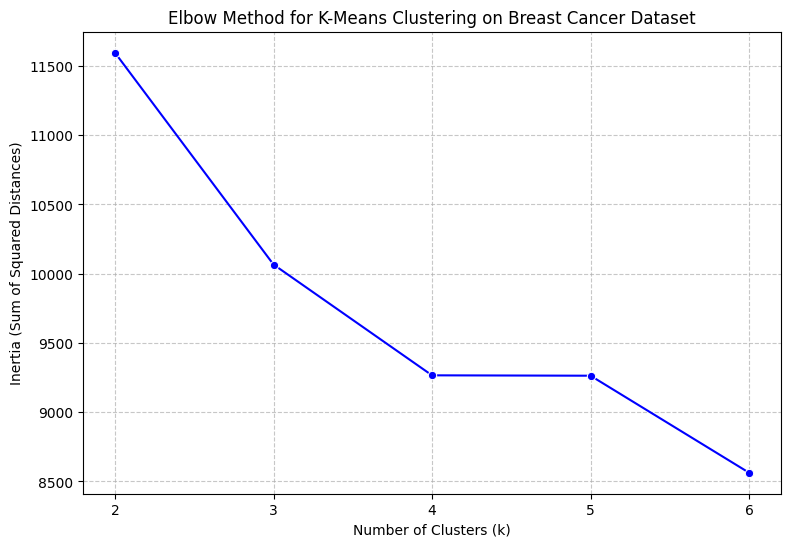


--- Interpretation of the Elbow Plot ---
The plot shows how the 'Inertia' decreases as the number of clusters (k) increases.
Look for an 'elbow' point in the curve, where the rate of decrease significantly slows down.
This 'elbow' often suggests an optimal number of clusters for the dataset.
For the Breast Cancer dataset, with its two true classes (malignant/benign), you might expect a clear elbow around k=2 or k=3.


In [14]:
#14.  Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer # To load the Breast Cancer dataset
from sklearn.preprocessing import StandardScaler # For standardizing features
from sklearn.cluster import KMeans # K-Means clustering algorithm
import time

# 1. Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data  # Features
y_true = cancer.target # True labels (0: malignant, 1: benign)
feature_names = cancer.feature_names
target_names = cancer.target_names

print("Breast Cancer Dataset loaded.")
print(f"Features (X) shape: {X.shape}")
print(f"True Labels (y_true) shape: {y_true.shape}")
print(f"Number of true classes: {len(np.unique(y_true))}\n")


# 2. Standardize the features
print("--- Standardizing Features ---")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features standardized. First 5 scaled samples (first 5 features):\n", pd.DataFrame(X_scaled[:5, :5], columns=feature_names[:5]))
print(f"Mean of scaled features (should be close to 0): {np.mean(X_scaled):.2f}")
print(f"Std Dev of scaled features (should be close to 1): {np.std(X_scaled):.2f}\n")


# 3. Define k range for evaluation
k_values = range(2, 7) # From k=2 to k=6 (range is exclusive at end)

# List to store inertia values
inertia_values = []

print("--- Calculating Inertia for K-Means with different k values ---")
for k in k_values:
    print(f"Running K-Means for k = {k}...")
    start_time = time.time()

    # Initialize and fit KMeans
    # n_init='auto' is recommended for newer scikit-learn (runs multiple initializations)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled) # Fit on scaled data

    end_time = time.time()
    kmeans_time = end_time - start_time
    print(f"  K-Means for k={k} completed in {kmeans_time:.4f} seconds.")

    # Append the inertia
    inertia_values.append(kmeans.inertia_)
    print(f"  Inertia for k={k}: {kmeans.inertia_:.2f}\n")

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({
    'Number of Clusters (k)': list(k_values),
    'Inertia': inertia_values
})

print("\n--- K-Means Inertia Results ---")
print(results_df.round(2))

# 4. Show results in a line plot (Elbow Method)
plt.figure(figsize=(9, 6))
sns.lineplot(x='Number of Clusters (k)', y='Inertia', data=results_df, marker='o', linestyle='-', color='blue')

plt.title('Elbow Method for K-Means Clustering on Breast Cancer Dataset')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(list(k_values)) # Ensure all k values are shown on x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\n--- Interpretation of the Elbow Plot ---")
print("The plot shows how the 'Inertia' decreases as the number of clusters (k) increases.")
print("Look for an 'elbow' point in the curve, where the rate of decrease significantly slows down.")
print("This 'elbow' often suggests an optimal number of clusters for the dataset.")
print("For the Breast Cancer dataset, with its two true classes (malignant/benign), you might expect a clear elbow around k=2 or k=3.")

In [15]:
#15.  Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 1. Generate some synthetic data
# n_samples: number of samples
# n_features: total number of features
# n_informative: number of informative features
# n_redundant: number of redundant features
# n_classes: number of classes
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=0, n_classes=2, random_state=42)

# 2. Split data into training and testing sets (optional for OOB, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train a Random Forest Classifier with oob_score=True
# n_estimators: number of trees in the forest
# random_state: for reproducibility
# oob_score: set to True to compute the OOB score
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

# 4. Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# 5. Access the OOB score
oob_score = rf_classifier.oob_score_

print(f"Out-of-Bag (OOB) Score: {oob_score:.4f}")

# You can also evaluate on the test set for comparison
test_accuracy = rf_classifier.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Out-of-Bag (OOB) Score: 0.9300
Test Set Accuracy: 0.9200


In [16]:
#16. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise6

import numpy as np
import pandas as pd
from sklearn.datasets import load_wine # To load the Wine dataset
from sklearn.preprocessing import StandardScaler # For standardizing features
from sklearn.cluster import DBSCAN # DBSCAN clustering algorithm
import time

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y_true = wine.target # True labels (cultivars) - used for context, not by DBSCAN
feature_names = wine.feature_names
target_names = wine.target_names

print("Wine Dataset loaded.")
print(f"Features (X) shape: {X.shape}")
print(f"True Labels (y_true) shape: {y_true.shape}")
print(f"Number of true classes (cultivars): {len(np.unique(y_true))}")
print(f"Feature Names: {feature_names}")
print(f"Target Names: {target_names}\n")

print("First 5 samples of raw features (first 5 features):\n", pd.DataFrame(X[:5, :5], columns=feature_names[:5]))


# 2. Scale the features
print("\n--- Standardizing Features ---")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features standardized. First 5 scaled samples (first 5 features):\n", pd.DataFrame(X_scaled[:5, :5], columns=feature_names[:5]))
print(f"Mean of scaled features (should be close to 0): {np.mean(X_scaled):.2f}")
print(f"Std Dev of scaled features (should be close to 1): {np.std(X_scaled):.2f}\n")


# 3. Apply DBSCAN clustering
# Choosing eps and min_samples for real-world data often involves trial and error
# or using methods like k-distance graph.
# Let's start with some common initial values.
eps_value = 0.8 # Maximum distance between two samples for one to be considered as in the neighborhood of the other.
min_samples_value = 5 # Number of samples in a neighborhood for a point to be considered as a core point.

print(f"Applying DBSCAN clustering with eps={eps_value} and min_samples={min_samples_value}...")
start_time = time.time()

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X_scaled) # Fit the model to the scaled data and predict the clusters

end_time = time.time()
dbscan_time = end_time - start_time
print(f"DBSCAN clustering completed in {dbscan_time:.4f} seconds.\n")

# Get the cluster labels assigned by DBSCAN
print("First 10 predicted cluster labels (where -1 is noise):", labels[:10])


# 4. Count the number of clusters (excluding noise) and noise points
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # Subtract 1 if noise is present
n_noise_ = list(labels).count(-1)

print("\n--- DBSCAN Clustering Summary ---")
print(f"Estimated number of clusters found: {n_clusters_}")
print(f"Number of noise points (outliers, labeled -1): {n_noise_}")

# Print the size of each cluster
unique_labels, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique_labels, counts))

print("\nSize of each cluster (including noise):")
for label, count in cluster_sizes.items():
    if label == -1:
        print(f"Noise points (-1): {count} samples")
    else:
        print(f"Cluster {label}: {count} samples")

print("\nNote: The number of clusters and noise points can vary significantly with different 'eps' and 'min_samples' values.")
print("Tuning these parameters is crucial for optimal DBSCAN performance on a given dataset.")

Wine Dataset loaded.
Features (X) shape: (178, 13)
True Labels (y_true) shape: (178,)
Number of true classes (cultivars): 3
Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Names: ['class_0' 'class_1' 'class_2']

First 5 samples of raw features (first 5 features):
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium
0    14.23        1.71  2.43               15.6      127.0
1    13.20        1.78  2.14               11.2      100.0
2    13.16        2.36  2.67               18.6      101.0
3    14.37        1.95  2.50               16.8      113.0
4    13.24        2.59  2.87               21.0      118.0

--- Standardizing Features ---
Features standardized. First 5 scaled samples (first 5 features):
     alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
0  1.518613   -0.562250  0.232053 

Synthetic data generated with 500 samples and 4 true centers.
Data shape: (500, 2)

Applying K-Means clustering with n_clusters=4...
K-Means clustering completed in 0.0062 seconds.

First 10 predicted cluster labels: [1 2 0 3 2 2 1 2 0 2]
K-Means cluster centroids:
 [[ 4.72182456  1.9238556 ]
 [-8.68153751  7.4554521 ]
 [-7.0009649  -6.90445754]
 [-2.60221541  9.09243505]]


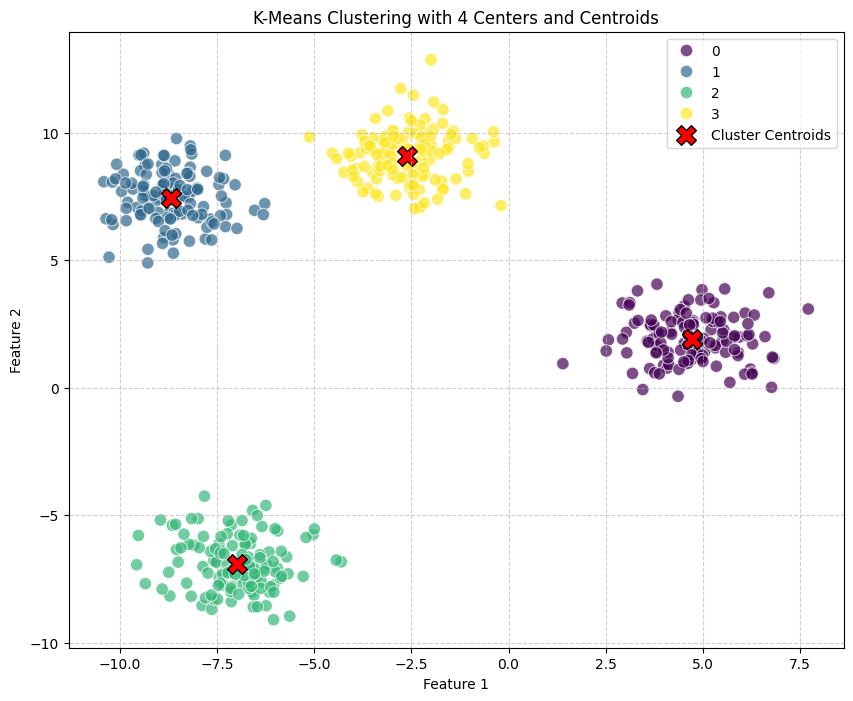


--- Interpretation of the plot ---
Each color represents a distinct cluster identified by the K-Means algorithm.
The red 'X' markers indicate the calculated centroids (centers) of these clusters.
You can visually confirm how K-Means successfully grouped the data points around these central locations, effectively separating the distinct blobs generated by make_blobs.


In [17]:
#17. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs # For generating synthetic data
from sklearn.cluster import KMeans      # K-Means clustering algorithm
import time

# 1. Generate synthetic data with 4 centers
n_samples = 500
n_features = 2 # Using 2 features for easy 2D visualization
n_centers = 4 # We'll generate data with 4 distinct centers
cluster_std_value = 1.0 # Standard deviation of the clusters (controls spread)
random_state = 42 # For reproducibility

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=cluster_std_value, random_state=random_state)

print(f"Synthetic data generated with {n_samples} samples and {n_centers} true centers.")
print(f"Data shape: {X.shape}\n")

# 2. Apply K-Means clustering
# We'll tell K-Means to find the same number of clusters as we generated.
kmeans = KMeans(n_clusters=n_centers, random_state=random_state, n_init='auto') # n_init='auto' is recommended for newer scikit-learn

print(f"Applying K-Means clustering with n_clusters={n_centers}...")
start_time = time.time()
kmeans.fit(X) # Fit K-Means to the data
end_time = time.time()
kmeans_time = end_time - start_time
print(f"K-Means clustering completed in {kmeans_time:.4f} seconds.\n")

# 3. Extract cluster labels and centroids
labels = kmeans.labels_ # Get the cluster label assigned to each data point
centers = kmeans.cluster_centers_ # Get the coordinates of the cluster centroids

print("First 10 predicted cluster labels:", labels[:10])
print("K-Means cluster centroids:\n", centers)

# 4. Plot the data points and cluster centers
plt.figure(figsize=(10, 8))

# Plot data points, colored by their assigned cluster label
# 'hue=labels' assigns a different color for each cluster ID
# 'palette' specifies the color scheme
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=80, alpha=0.7, legend='full')

# Plot the cluster centers on top of the data points
# 'marker="X"' uses an 'X' shape for centroids
# 's=200' makes the centroids larger
# 'color="red"' makes them stand out
# 'edgecolor="black"' adds a black border for clarity
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', edgecolor='black', label='Cluster Centroids')

plt.title(f'K-Means Clustering with {n_centers} Centers and Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend() # Show legend for both data points and centroids
plt.show()

print("\n--- Interpretation of the plot ---")
print("Each color represents a distinct cluster identified by the K-Means algorithm.")
print("The red 'X' markers indicate the calculated centroids (centers) of these clusters.")
print("You can visually confirm how K-Means successfully grouped the data points around these central locations, effectively separating the distinct blobs generated by make_blobs.")

In [18]:
#18. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # To load the Iris dataset
from sklearn.preprocessing import StandardScaler # For optional standardization
from sklearn.cluster import DBSCAN # DBSCAN clustering algorithm
import time

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y_true = iris.target # True labels (species: Setosa, Versicolor, Virginica) - for context

print("Iris Dataset loaded.")
print(f"Features (X) shape: {X.shape}")
print(f"True Labels (y_true) shape: {y_true.shape}")
print(f"Number of true classes (species): {len(np.unique(y_true))}\n")

# Display first few samples and their true labels for context
print("First 5 samples of features:\n", pd.DataFrame(X[:5], columns=iris.feature_names))
print("\nFirst 5 true labels:", y_true[:5], " (mapping to:", [iris.target_names[i] for i in y_true[:5]], ")\n")

# 2. Scale Features (Recommended for distance-based algorithms like DBSCAN)
print("--- Standardizing Features ---")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features standardized. First 5 scaled samples:\n", pd.DataFrame(X_scaled[:5], columns=iris.feature_names))
print(f"Mean of scaled features (should be close to 0): {np.mean(X_scaled):.2f}")
print(f"Std Dev of scaled features (should be close to 1): {np.std(X_scaled):.2f}\n")


# 3. Apply DBSCAN clustering
# Choosing eps and min_samples for DBSCAN is critical and often requires tuning.
# For Iris, specific values might work better. Let's try some common ones.
eps_value = 0.5 # Maximum distance between two samples for one to be considered as in the neighborhood of the other.
min_samples_value = 5 # Number of samples (including itself) in a neighborhood for a point to be considered as a core point.

print(f"Applying DBSCAN clustering with eps={eps_value} and min_samples={min_samples_value}...")
start_time = time.time()

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X_scaled) # Fit the model to the scaled data and predict the clusters

end_time = time.time()
dbscan_time = end_time - start_time
print(f"DBSCAN clustering completed in {dbscan_time:.4f} seconds.\n")

# Get the cluster labels assigned by DBSCAN
print("First 10 predicted cluster labels (where -1 is noise):", labels[:10])


# 4. Print how many samples were identified as noise
noise_samples_count = list(labels).count(-1)
n_clusters_found = len(set(labels)) - (1 if -1 in labels else 0) # Number of clusters found (excluding noise)

print("\n--- DBSCAN Clustering Summary ---")
print(f"Total number of samples: {len(X)}")
print(f"Number of clusters found (excluding noise): {n_clusters_found}")
print(f"Number of samples identified as noise: {noise_samples_count}")

# Optional: Print the size of each cluster
unique_labels, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique_labels, counts))

print("\nSize of each cluster (including noise):")
for label, count in cluster_sizes.items():
    if label == -1:
        print(f"Noise points (-1): {count} samples")
    else:
        print(f"Cluster {label}: {count} samples")

print("\nNote: The count of noise samples and clusters can change significantly with different 'eps' and 'min_samples' values.")
print("Tuning these parameters is crucial for optimal DBSCAN performance on a given dataset.")

Iris Dataset loaded.
Features (X) shape: (150, 4)
True Labels (y_true) shape: (150,)
Number of true classes (species): 3

First 5 samples of features:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

First 5 true labels: [0 0 0 0 0]  (mapping to: [np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa')] )

--- Standardizing Features ---
Features standardized. First 5 scaled samples:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.

In [19]:
#19.  Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons # For generating non-linear data
from sklearn.cluster import KMeans      # K-Means clustering algorithm
import time

# 1. Generate synthetic non-linearly separable data using make_moons
n_samples = 500
noise_level = 0.05 # Add some noise to make it more realistic
random_state = 42

X, y_true = make_moons(n_samples=n_samples, noise=noise_level, factor=0.5, random_state=random_state)
# factor: Scale factor between inner and outer circle. 0.5 means inner circle radius is half of outer.

print(f"Synthetic 'make_moons' data generated with {n_samples} samples.")
print(f"Data shape: {X.shape}\n")

# 2. Apply K-Means clustering
# We know there are two moon shapes, so we set n_clusters = 2
kmeans = KMeans(n_clusters=2, random_state=random_state, n_init='auto') # n_init='auto' is recommended for newer scikit-learn

print(f"Applying K-Means clustering with n_clusters=2...")
start_time = time.time()
kmeans.fit(X) # Fit K-Means to the data
end_time = time.time()
kmeans_time = end_time - start_time
print(f"K-Means clustering completed in {kmeans_time:.4f} seconds.\n")

# Get the cluster labels assigned by K-Means
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

print("K-Means assigned labels for first 10 samples:", labels[:10])
print("K-Means cluster centers:\n", centers)

# 3. Visualize the clustering result
plt.figure(figsize=(10, 8))

# Plot data points, colored by their assigned cluster label
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=80, alpha=0.7, legend='full')

# Plot the cluster centers on top of the data points
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', edgecolor='black', label='Cluster Centroids')

plt.title(f'K-Means Clustering on make_moons Data (k=2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend() # Show legend for both data points and centroids
plt.show()

print("\n--- Interpretation of the plot ---")
print("Each color represents a cluster identified by the K-Means algorithm.")
print("The red 'X' markers indicate the calculated centroids (centers) of these clusters.")
print("You can observe how K-Means struggles with the non-convex shapes of the 'moons'.")
print("It tends to cut through the moon shapes, assigning points from one moon to the other cluster based on Euclidean distance to the centroids, rather than respecting the natural curvature of the data.")

TypeError: got an unexpected keyword argument 'factor'

Synthetic data generated with 700 samples and 5 true centers.
Data shape: (700, 2)

Applying K-Means clustering with n_clusters=5...
K-Means clustering completed in 0.0173 seconds.

First 10 predicted cluster labels: [1 2 4 4 1 0 2 1 0 4]

--- K-Means Clustering Evaluation ---
Silhouette Score for k=5: 0.6684
A score closer to 1 indicates well-separated clusters.


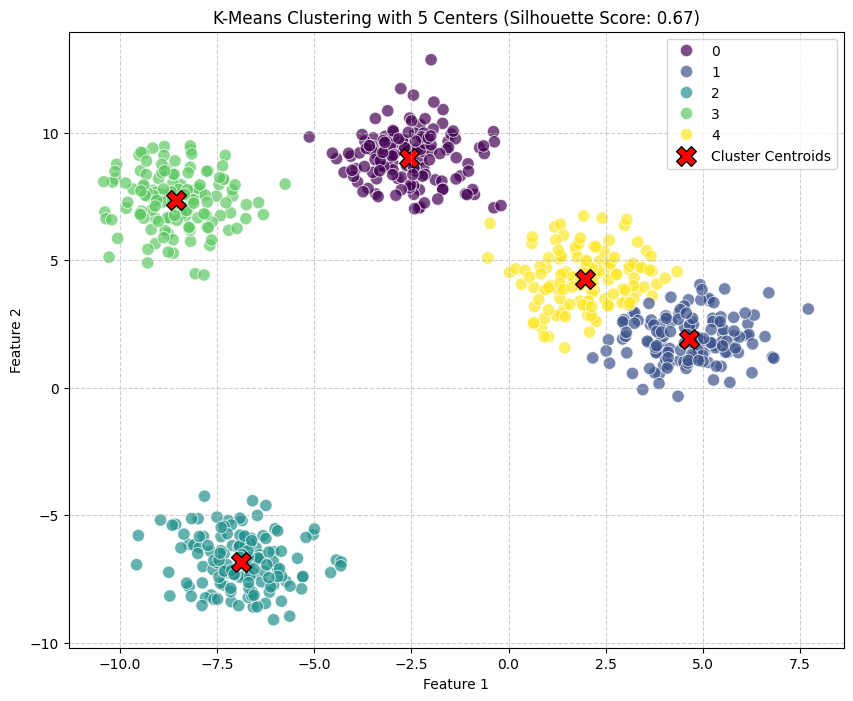


--- Interpretation of the plot ---
Each color represents a distinct cluster identified by K-Means.
The red 'X' markers are the cluster centroids.
The high Silhouette Score (if observed) visually corresponds to clearly separated and compact clusters.


In [20]:
#20. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Import Silhouette Score
import time

# 1. Generate synthetic data with 5 centers
n_samples = 700
n_features = 2 # For easy 2D visualization
n_centers = 5 # We'll generate data with 5 distinct centers
cluster_std_value = 1.0 # Standard deviation of the clusters (controls spread)
random_state = 42 # For reproducibility

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=cluster_std_value, random_state=random_state)

print(f"Synthetic data generated with {n_samples} samples and {n_centers} true centers.")
print(f"Data shape: {X.shape}\n")

# 2. Apply K-Means clustering
# We'll tell K-Means to find the same number of clusters as we generated.
kmeans = KMeans(n_clusters=n_centers, random_state=random_state, n_init='auto') # n_init='auto' is recommended for newer scikit-learn

print(f"Applying K-Means clustering with n_clusters={n_centers}...")
start_time = time.time()
kmeans.fit(X) # Fit K-Means to the data
end_time = time.time()
kmeans_time = end_time - start_time
print(f"K-Means clustering completed in {kmeans_time:.4f} seconds.\n")

# 3. Get cluster labels
labels = kmeans.labels_ # Get the cluster label assigned to each data point

print("First 10 predicted cluster labels:", labels[:10])

# 4. Calculate Silhouette Score
score = silhouette_score(X, labels)

print(f"\n--- K-Means Clustering Evaluation ---")
print(f"Silhouette Score for k={n_centers}: {score:.4f}")
print("A score closer to 1 indicates well-separated clusters.")

# Optional: Visualize the clusters and centroids
plt.figure(figsize=(10, 8))

# Plot data points, colored by their assigned cluster label
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=80, alpha=0.7, legend='full')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', edgecolor='black', label='Cluster Centroids')

plt.title(f'K-Means Clustering with {n_centers} Centers (Silhouette Score: {score:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print("\n--- Interpretation of the plot ---")
print("Each color represents a distinct cluster identified by K-Means.")
print("The red 'X' markers are the cluster centroids.")
print("The high Silhouette Score (if observed) visually corresponds to clearly separated and compact clusters.")

In [21]:
#21.  Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 1. Generate some synthetic data
# n_samples: number of samples
# n_features: total number of features
# n_informative: number of informative features
# n_redundant: number of redundant features
# n_classes: number of classes
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=0, n_classes=2, random_state=42)

# 2. Split data into training and testing sets (optional for OOB, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train a Random Forest Classifier with oob_score=True
# n_estimators: number of trees in the forest
# random_state: for reproducibility
# oob_score: set to True to compute the OOB score
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

# 4. Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# 5. Access the OOB score
oob_score = rf_classifier.oob_score_

print(f"Out-of-Bag (OOB) Score: {oob_score:.4f}")

# You can also evaluate on the test set for comparison
test_accuracy = rf_classifier.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Out-of-Bag (OOB) Score: 0.9300
Test Set Accuracy: 0.9200


In [22]:
#23. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 1. Generate some synthetic data
# n_samples: number of samples
# n_features: total number of features
# n_informative: number of informative features
# n_redundant: number of redundant features
# n_classes: number of classes
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=0, n_classes=2, random_state=42)

# 2. Split data into training and testing sets (optional for OOB, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train a Random Forest Classifier with oob_score=True
# n_estimators: number of trees in the forest
# random_state: for reproducibility
# oob_score: set to True to compute the OOB score
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

# 4. Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# 5. Access the OOB score
oob_score = rf_classifier.oob_score_

print(f"Out-of-Bag (OOB) Score: {oob_score:.4f}")

# You can also evaluate on the test set for comparison
test_accuracy = rf_classifier.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Out-of-Bag (OOB) Score: 0.9300
Test Set Accuracy: 0.9200


Iris Dataset loaded.
Features (X) shape: (150, 4)
True Labels (y_true) shape: (150,)
Number of true classes (species): 3

--- Standardizing Features ---
Features standardized.

Applying K-Means clustering with n_clusters=3...
K-Means clustering completed in 0.0038 seconds.

Overall average Silhouette Score for K-Means with k=3: 0.4799



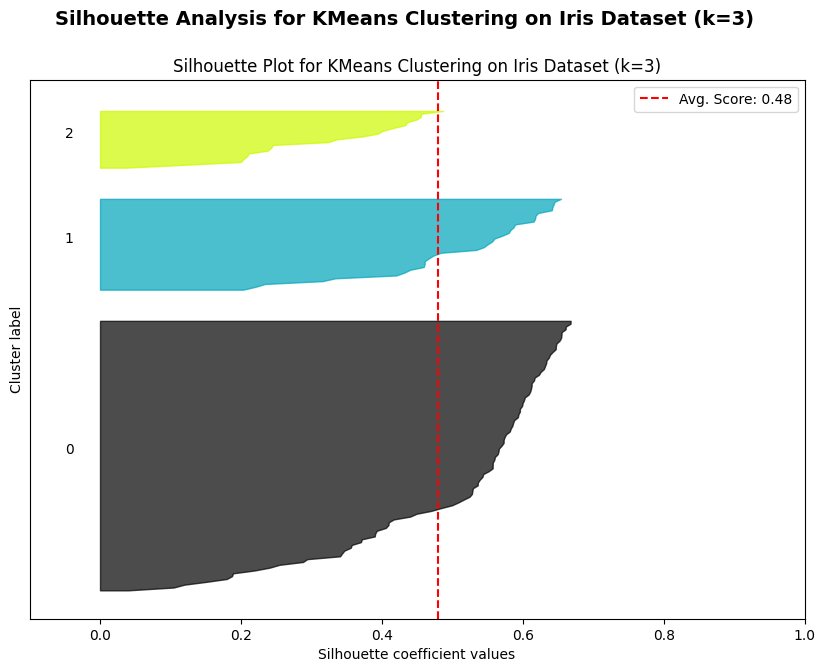


--- Interpretation of the Silhouette Plot ---
Each horizontal bar represents a data sample.
The length of the bar indicates its Silhouette Coefficient value.
Bars extending closer to +1 (right) indicate well-clustered samples.
Bars close to 0 indicate samples near a decision boundary.
Bars extending to -1 (left) indicate misclassified samples.
The red dashed line shows the average Silhouette Score across all samples.
You should typically see one cluster (likely Setosa) with consistently high coefficients, and the other two (Versicolor/Virginica) having more variability due to their overlap.


In [23]:
#24.Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm # For colormaps
from sklearn.datasets import load_iris # To load the Iris dataset
from sklearn.preprocessing import StandardScaler # For standardizing features
from sklearn.cluster import KMeans # K-Means clustering algorithm
from sklearn.metrics import silhouette_samples, silhouette_score # For individual and average silhouette scores
import time

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y_true = iris.target # True labels (species: Setosa, Versicolor, Virginica) - for context

print("Iris Dataset loaded.")
print(f"Features (X) shape: {X.shape}")
print(f"True Labels (y_true) shape: {y_true.shape}")
print(f"Number of true classes (species): {len(np.unique(y_true))}\n")

# 2. Standardize Features
print("--- Standardizing Features ---")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features standardized.\n")

# 3. Apply K-Means clustering
n_clusters = 3 # We know Iris has 3 true classes, so we'll try to find 3.
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

print(f"Applying K-Means clustering with n_clusters={n_clusters}...")
start_time = time.time()
cluster_labels = kmeans.fit_predict(X_scaled)
end_time = time.time()
kmeans_time = end_time - start_time
print(f"K-Means clustering completed in {kmeans_time:.4f} seconds.\n")

# 4. Calculate individual Silhouette Coefficients
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

print(f"Overall average Silhouette Score for K-Means with k={n_clusters}: {silhouette_avg:.4f}\n")


# 5. Plot the Silhouette Coefficient for each sample
fig, ax1 = plt.subplots(1, 1, figsize=(10, 7))

# The 1st subplot is for the silhouette plot
ax1.set_xlim([-0.1, 1]) # Silhouette scores range from -1 to +1, good to extend slightly
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10]) # Set y-axis limits to fit all samples and spacing

y_lower = 10 # Starting point for plotting each cluster's silhouette values

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Choose a color from a colormap for each cluster
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for 0 samples

ax1.set_title(f"Silhouette Plot for KMeans Clustering on Iris Dataset (k={n_clusters})")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# Draw vertical line for average silhouette score
ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label=f'Avg. Score: {silhouette_avg:.2f}')
ax1.legend()

ax1.set_yticks([]) # Clear the yaxis labels / ticks
plt.suptitle(f'Silhouette Analysis for KMeans Clustering on Iris Dataset (k={n_clusters})',
             fontsize=14, fontweight='bold')
plt.show()

print("\n--- Interpretation of the Silhouette Plot ---")
print("Each horizontal bar represents a data sample.")
print("The length of the bar indicates its Silhouette Coefficient value.")
print("Bars extending closer to +1 (right) indicate well-clustered samples.")
print("Bars close to 0 indicate samples near a decision boundary.")
print("Bars extending to -1 (left) indicate misclassified samples.")
print("The red dashed line shows the average Silhouette Score across all samples.")
print("You should typically see one cluster (likely Setosa) with consistently high coefficients, and the other two (Versicolor/Virginica) having more variability due to their overlap.")

Wine Dataset loaded.
Features (X) shape: (178, 13)
True Labels (y_true) shape: (178,)
Number of true classes (cultivars): 3
Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

First 5 samples of raw features (all 13 features):
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29    

<Figure size 1200x1000 with 0 Axes>

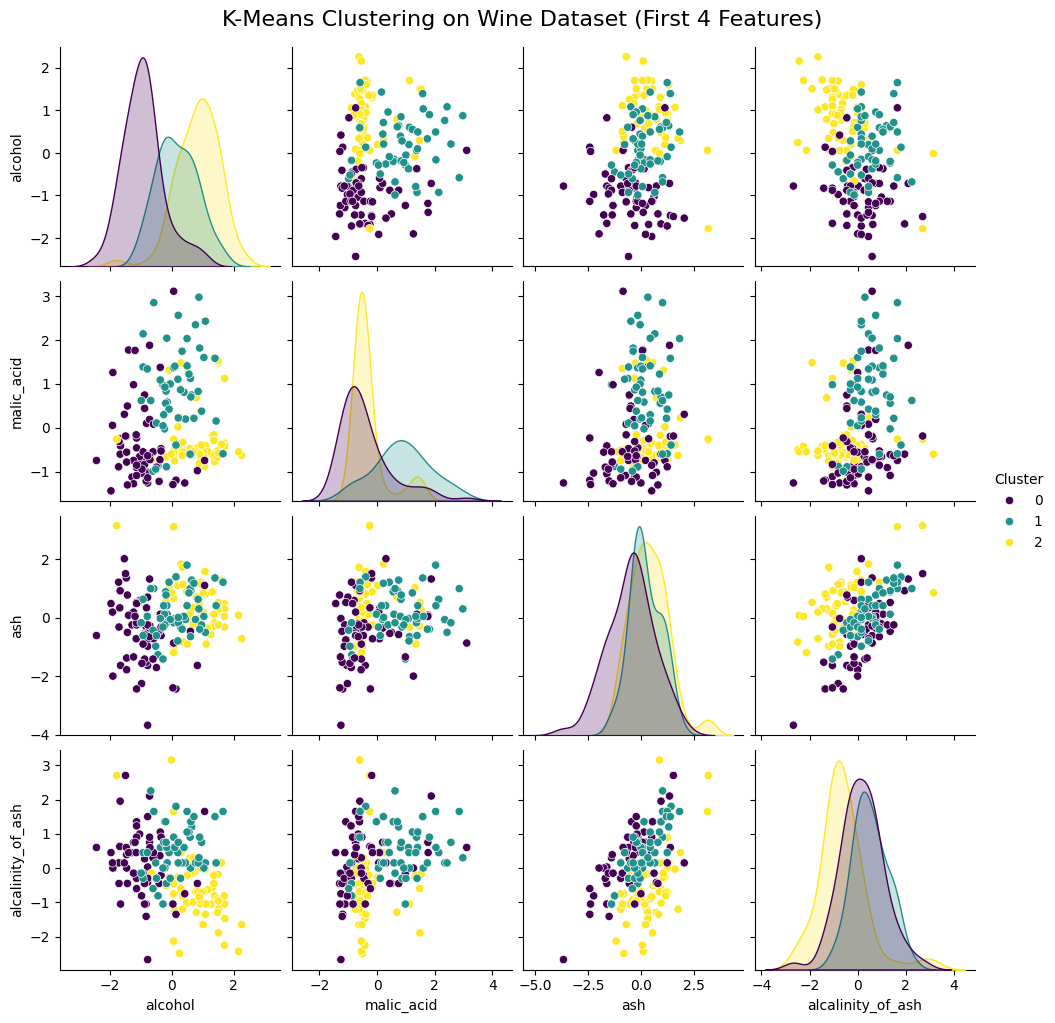


--- Interpretation of the Pairplot ---
Each scatterplot in the grid shows the relationship between two of the first four features.
The points are colored according to the cluster assigned by K-Means.
The diagonal plots show the distribution of each feature, colored by cluster.
You can visually assess how well K-Means separated the data in different feature pairs.
Ideally, points of the same color should be grouped together and distinct from other colors.


In [24]:
#26. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine # To load the Wine dataset
from sklearn.preprocessing import StandardScaler # For standardizing features
from sklearn.cluster import KMeans # K-Means clustering algorithm
import time

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y_true = wine.target # True labels (cultivars) - for context/comparison
feature_names = wine.feature_names
target_names = wine.target_names

print("Wine Dataset loaded.")
print(f"Features (X) shape: {X.shape}")
print(f"True Labels (y_true) shape: {y_true.shape}")
print(f"Number of true classes (cultivars): {len(np.unique(y_true))}")
print(f"Feature Names: {feature_names}\n")

# Display first few samples and their true labels for context
print("First 5 samples of raw features (all 13 features):\n", pd.DataFrame(X[:5], columns=feature_names))
print("\nFirst 5 true labels:", y_true[:5], " (mapping to:", [wine.target_names[i] for i in y_true[:5]], ")\n")


# 2. Standardize the features
print("--- Standardizing Features ---")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features standardized. First 5 scaled samples (first 5 features):\n", pd.DataFrame(X_scaled[:5, :5], columns=feature_names[:5]))
print(f"Mean of scaled features (should be close to 0): {np.mean(X_scaled):.2f}")
print(f"Std Dev of scaled features (should be close to 1): {np.std(X_scaled):.2f}\n")


# 3. Apply K-Means clustering
n_clusters = 3 # We know the Wine dataset has 3 true cultivars
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto') # n_init='auto' is recommended for newer scikit-learn

print(f"Applying K-Means clustering with n_clusters={n_clusters}...")
start_time = time.time()
cluster_labels = kmeans.fit_predict(X_scaled) # Fit on scaled data
end_time = time.time()
kmeans_time = end_time - start_time
print(f"K-Means clustering completed in {kmeans_time:.4f} seconds.\n")

# Get the cluster labels assigned by K-Means
print("First 10 predicted cluster labels:", cluster_labels[:10])


# 4. Prepare Data for Pairplot (first 4 features + cluster labels)
# Select the first 4 features from the *scaled* data
X_selected_features = X_scaled[:, :4]
selected_feature_names = feature_names[:4]

# Create a DataFrame for seaborn.pairplot
df_plot = pd.DataFrame(X_selected_features, columns=selected_feature_names)
df_plot['Cluster'] = cluster_labels # Add the KMeans cluster labels as a new column

print(f"\nDataFrame for pairplot (first 5 rows, first 4 features + Cluster):\n")
print(df_plot.head())


# 5. Visualize with Seaborn Pairplot
print("\n--- Generating Seaborn Pairplot with K-Means Cluster Assignments ---")
plt.figure(figsize=(12, 10)) # Adjust figure size for better readability

# hue='Cluster' will color the points based on their assigned K-Means cluster
# palette='viridis' provides a good color scheme
# diag_kind='kde' shows kernel density estimate on the diagonal for feature distributions
sns.pairplot(df_plot, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('K-Means Clustering on Wine Dataset (First 4 Features)', y=1.02, fontsize=16) # Title for the entire plot
plt.show()

print("\n--- Interpretation of the Pairplot ---")
print("Each scatterplot in the grid shows the relationship between two of the first four features.")
print("The points are colored according to the cluster assigned by K-Means.")
print("The diagonal plots show the distribution of each feature, colored by cluster.")
print("You can visually assess how well K-Means separated the data in different feature pairs.")
print("Ideally, points of the same color should be grouped together and distinct from other colors.")

Synthetic noisy blobs generated with 800 samples and 3 true centers.
Cluster standard deviation: 1.8 (simulating noise/overlap)
Data shape: (800, 2)

Applying DBSCAN clustering with eps=0.8 and min_samples=5...
DBSCAN clustering completed in 0.0110 seconds.


--- DBSCAN Clustering Results Summary ---
Total number of samples: 800
Number of clusters identified (excluding noise): 5
Number of samples identified as noise: 63

Detailed breakdown of cluster sizes:
  Noise points (-1): 63 samples
  Cluster 0: 243 samples
  Cluster 1: 245 samples
  Cluster 2: 239 samples
  Cluster 3: 5 samples
  Cluster 4: 5 samples


<ipython-input-25-2acc040fbb40>:89: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1],
<ipython-input-25-2acc040fbb40>:89: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1],


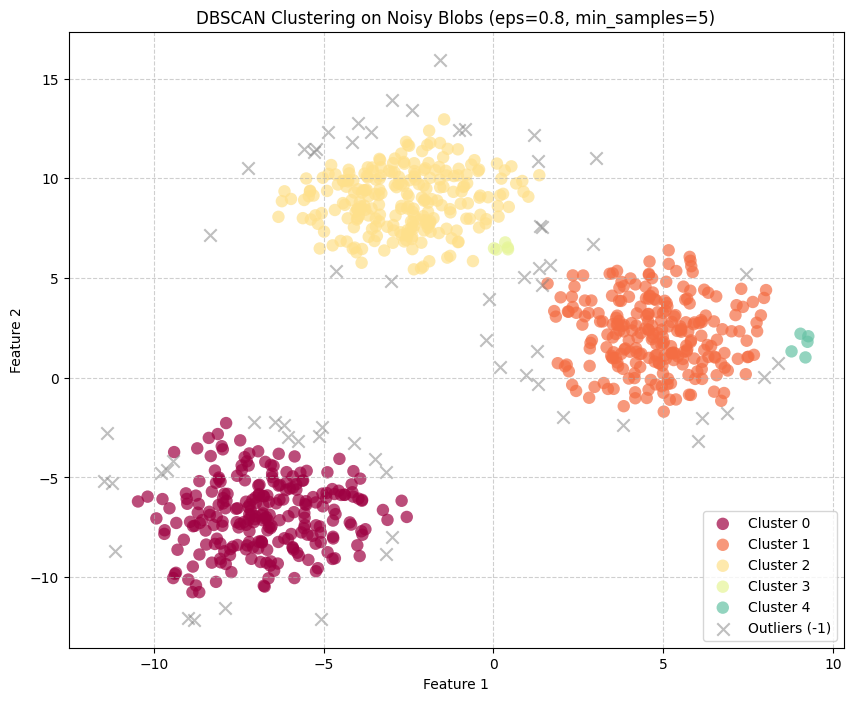


--- Interpretation of the plot ---
Different colors represent different clusters identified by DBSCAN.
The 'x' markers in grey/black represent the noise points (outliers).
You can observe how DBSCAN attempts to find dense regions and labels points outside these regions as noise.
The effectiveness depends heavily on the chosen 'eps' and 'min_samples' values.


In [25]:
#27. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs # For generating synthetic data
from sklearn.cluster import DBSCAN      # DBSCAN clustering algorithm
import time

# 1. Generate noisy blobs using make_blobs
n_samples = 800
n_features = 2 # For easy 2D visualization
n_centers = 3 # Let's generate 3 primary centers
# Increase cluster_std to make blobs more spread out and 'noisy' relative to each other
cluster_std_value = 1.8 # Experiment with this value (e.g., 1.0 for distinct, 2.5 for very noisy)
random_state = 42 # For reproducibility

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=cluster_std_value, random_state=random_state)

print(f"Synthetic noisy blobs generated with {n_samples} samples and {n_centers} true centers.")
print(f"Cluster standard deviation: {cluster_std_value} (simulating noise/overlap)")
print(f"Data shape: {X.shape}\n")

# 2. Apply DBSCAN clustering
# Choosing appropriate eps and min_samples is crucial for DBSCAN.
# For noisy blobs, you need to balance finding clusters vs. identifying noise.
# These values often require experimentation.
eps_value = 0.8 # Maximum distance for neighborhood.
min_samples_value = 5 # Minimum points to form a dense region.

print(f"Applying DBSCAN clustering with eps={eps_value} and min_samples={min_samples_value}...")
start_time = time.time()

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X) # Fit the model and predict cluster labels

end_time = time.time()
dbscan_time = end_time - start_time
print(f"DBSCAN clustering completed in {dbscan_time:.4f} seconds.\n")

# 3. Count clusters and noise points
unique_labels, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique_labels, counts))

n_clusters_found = len(set(labels)) - (1 if -1 in labels else 0) # Subtract 1 if noise is present
noise_samples_count = cluster_counts.get(-1, 0) # Get count of -1 label, default to 0 if no noise

# 4. Print the counts
print("\n--- DBSCAN Clustering Results Summary ---")
print(f"Total number of samples: {len(X)}")
print(f"Number of clusters identified (excluding noise): {n_clusters_found}")
print(f"Number of samples identified as noise: {noise_samples_count}")

print("\nDetailed breakdown of cluster sizes:")
for label, count in cluster_counts.items():
    if label == -1:
        print(f"  Noise points (-1): {count} samples")
    else:
        print(f"  Cluster {label}: {count} samples")

# Optional: Visualize the results
plt.figure(figsize=(10, 8))

# Define a color map for clusters, ensuring noise (-1) gets a distinct color (e.g., black)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black or grey color for noise points
        marker = 'x'
        size = 80
        alpha = 0.5
        edgecolor = 'black'
        facecolor = 'gray'
        label = 'Outliers (-1)'
    else:
        marker = 'o'
        size = 80
        alpha = 0.7
        edgecolor = 'none'
        facecolor = col
        label = f'Cluster {k}'

    class_member_mask = (labels == k)
    xy = X[class_member_mask]

    plt.scatter(xy[:, 0], xy[:, 1],
                marker=marker, s=size, c=facecolor, edgecolor=edgecolor, alpha=alpha,
                label=label)

plt.title(f'DBSCAN Clustering on Noisy Blobs (eps={eps_value}, min_samples={min_samples_value})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.show()

print("\n--- Interpretation of the plot ---")
print("Different colors represent different clusters identified by DBSCAN.")
print("The 'x' markers in grey/black represent the noise points (outliers).")
print("You can observe how DBSCAN attempts to find dense regions and labels points outside these regions as noise.")
print("The effectiveness depends heavily on the chosen 'eps' and 'min_samples' values.")

Digits Dataset loaded.
Features (X) shape: (1797, 64)
True Labels (y_true) shape: (1797,)
Number of true classes (digits): 10

Applying t-SNE dimensionality reduction to 2 dimensions...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE completed in 16.1266 seconds.
Reduced data shape: (1797, 2)

Applying Agglomerative Clustering with 10 clusters (linkage='ward') on t-SNE data...
Agglomerative Clustering completed in 0.1745 seconds.

First 10 predicted cluster labels: [7 0 4 9 3 8 6 5 4 8]


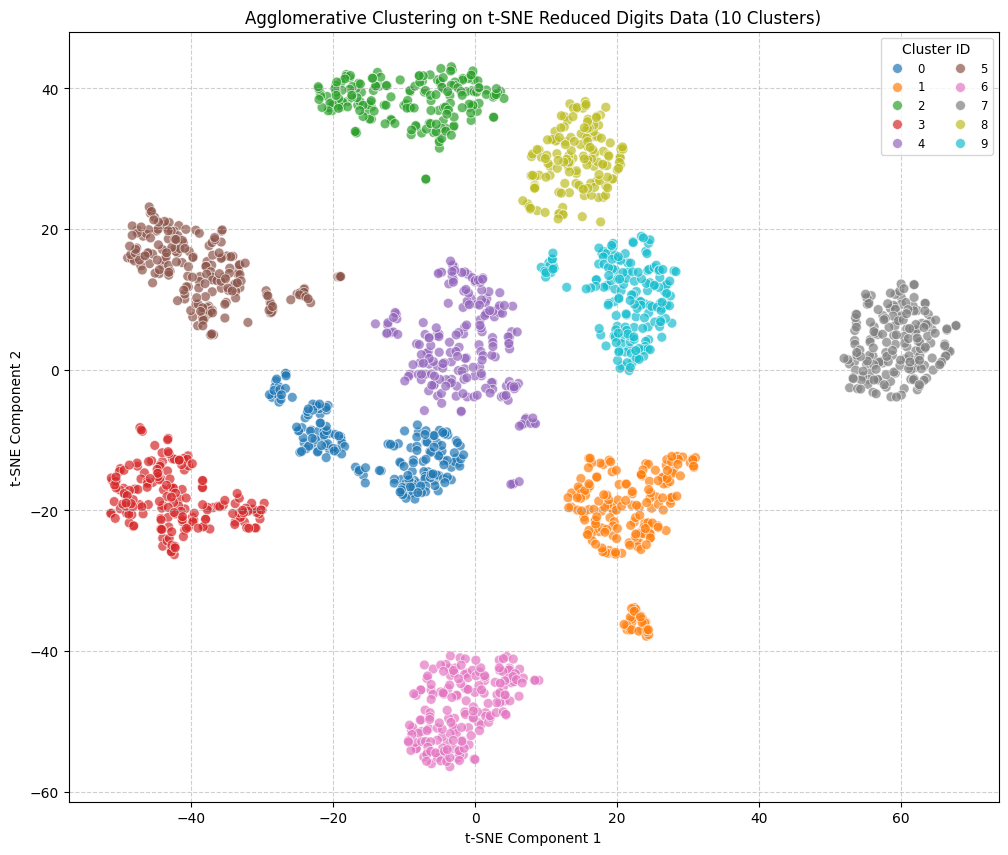


--- Interpretation of the plot ---
The plot shows the Digits dataset projected onto 2 dimensions by t-SNE.
Each color represents a cluster identified by Agglomerative Clustering.
You should observe that t-SNE has grouped similar digits together, forming visually distinct 'blobs' or 'arms'.
Agglomerative Clustering then attempts to find these groupings in the 2D space.
Ideally, each color (cluster) should correspond to a distinct digit group, but some overlap or fragmentation might occur due to the complexity of the data and the nature of t-SNE projection.


In [26]:
#28.  Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits # To load the Digits dataset
from sklearn.manifold import TSNE       # For t-SNE dimensionality reduction
from sklearn.cluster import AgglomerativeClustering # Agglomerative Clustering algorithm
import time

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data  # Features (64 dimensions - 8x8 pixel images)
y_true = digits.target # True labels (0-9) - for context/comparison

print("Digits Dataset loaded.")
print(f"Features (X) shape: {X.shape}")
print(f"True Labels (y_true) shape: {y_true.shape}")
print(f"Number of true classes (digits): {len(np.unique(y_true))}\n")

# 2. Dimensionality Reduction with t-SNE
# t-SNE can be computationally intensive for very large datasets.
# Perplexity is a critical parameter (typically 5-50).
# We'll use a fixed random_state for reproducibility.
n_components_tsne = 2 # Reduce to 2 dimensions for plotting
perplexity_value = 30 # Common value, can be tuned
n_iter_tsne = 1000    # Number of iterations

print(f"Applying t-SNE dimensionality reduction to {n_components_tsne} dimensions...")
start_time_tsne = time.time()

tsne = TSNE(n_components=n_components_tsne, perplexity=perplexity_value,
            n_iter=n_iter_tsne, random_state=42, learning_rate='auto', init='random')
X_tsne = tsne.fit_transform(X)

end_time_tsne = time.time()
tsne_time = end_time_tsne - start_time_tsne
print(f"t-SNE completed in {tsne_time:.4f} seconds.")
print(f"Reduced data shape: {X_tsne.shape}\n")


# 3. Apply Agglomerative Clustering to the t-SNE transformed data
# We aim for 10 clusters, matching the true number of digits (0-9).
n_clusters_to_find = 10

print(f"Applying Agglomerative Clustering with {n_clusters_to_find} clusters (linkage='ward') on t-SNE data...")
start_time_agg = time.time()

# Initialize AgglomerativeClustering (ward linkage is good for general purpose)
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_to_find, linkage='ward')

# Fit the model to the t-SNE data and predict the clusters
predicted_labels = agg_clustering.fit_predict(X_tsne)

end_time_agg = time.time()
agg_time = end_time_agg - start_time_agg
print(f"Agglomerative Clustering completed in {agg_time:.4f} seconds.\n")

# Get the cluster labels assigned
print("First 10 predicted cluster labels:", predicted_labels[:10])


# 4. Plot the clusters
plt.figure(figsize=(12, 10))

# Plot data points, colored by their assigned cluster label
# Use a palette that provides enough distinct colors for 10 clusters
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=predicted_labels, palette='tab10', s=50, alpha=0.7, legend='full')

plt.title(f'Agglomerative Clustering on t-SNE Reduced Digits Data ({n_clusters_to_find} Clusters)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster ID', loc='best', ncol=2, fontsize='small')
plt.show()

print("\n--- Interpretation of the plot ---")
print("The plot shows the Digits dataset projected onto 2 dimensions by t-SNE.")
print("Each color represents a cluster identified by Agglomerative Clustering.")
print("You should observe that t-SNE has grouped similar digits together, forming visually distinct 'blobs' or 'arms'.")
print("Agglomerative Clustering then attempts to find these groupings in the 2D space.")
print("Ideally, each color (cluster) should correspond to a distinct digit group, but some overlap or fragmentation might occur due to the complexity of the data and the nature of t-SNE projection.")